#PREPROCESSING AND CREATING DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/IMD/2017-2022 data/MAHARASHTRA_MUMBAI_CITY_MUMBAI_COLABA_18.8978_72.8128_11.98_2017-01-01_2022-08-10_AWS.csv")
df2=pd.read_csv("/content/drive/MyDrive/IMD/2017-2022 data/MAHARASHTRA_MUMBAI_CITY_MUMBAI_COLABA_18.8978_72.8128_11.98_2017-01-01_2022-08-10_AWS2.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df1["date_time"]=df1["DATE"]+" "+df1["TIME(UTC)"]

In [ ]:
df1["date_time"]=pd.to_datetime(df1["date_time"])
df1=df1.set_index("date_time")

In [ ]:
df1=df1.drop(["TEMP_MIN(C)","TEMP_MAX(C)","TEMP_MIN_MAX_DAY(C)","WIND_SPEED(kt)","Unnamed: 15"],axis=1)

In [ ]:
df1=df1.drop(["DATE","TIME(UTC)"],axis=1)

In [ ]:
df1=df1.resample("H").mean().interpolate(limit_direction="forward",method="linear")

In [ ]:
df1

,RAIN_HOURLY(mm),RAIN_DAILY(mm),TEMP(C),DEW_POINT(C),RH(%),WIND_DIR(deg),SLP(hPa),MSLP(hPa),SUNSHINE
date_time,,,,,,,,,
2017-01-19 06:00:00,0.0,0.0,47.6,35.50,52.0,138.0,1015.30,1016.60,0.37
2017-01-19 07:00:00,2.5,0.0,38.0,26.40,51.5,0.0,960.00,961.70,0.00
2017-01-19 08:00:00,5.0,5.0,28.4,17.30,51.0,243.0,1013.40,1014.80,0.29
2017-01-19 09:00:00,0.0,5.0,27.9,19.40,60.0,290.0,1012.30,1013.70,1.29
2017-01-19 10:00:00,0.0,5.0,27.5,21.80,71.0,324.0,1011.60,1013.00,2.29
...,...,...,...,...,...,...,...,...,...
2017-12-31 10:00:00,0.0,0.0,27.8,21.60,69.0,318.0,1009.40,1010.80,14.00
2017-12-31 11:00:00,18.0,0.0,1.6,21.75,74.5,0.0,1008.85,1010.25,0.00
2017-12-31 12:00:00,0.0,0.0,25.6,21.90,80.0,338.0,1008.30,1009.70,16.00


In [ ]:
df2

,DATE,TIME(UTC),RAIN_HOURLY(mm),RAIN_DAILY(mm),TEMP(C),TEMP_MIN(C),TEMP_MAX(C),TEMP_MIN_MAX_DAY(C),DEW_POINT(C),RH(%),RH_MIN_MAX_DAY(%),WIND_DIR_10m(deg),WIND_SPEED_10m(kt),WIND_MAX/GUST_10m(kt),SLP(hPa),MSLP(hPa),SUNSHINE(HH:MM),Unnamed: 17
0,2018-01-01,5:00:00,0.0,0.0,24.9,23.7,24.9,NaN,20.8,78.0,NaN,129.0,3.0,None,1011.6,1013.0,9.0,NaN
1,2018-01-01,6:00:00,0.0,0.0,39.4,24.8,26.6,NaN,31.4,64.0,NaN,113.0,3.0,None,1011.0,1012.3,10.0,NaN
2,2018-01-01,7:00:00,0.0,0.0,27.8,26.6,28.9,NaN,18.3,56.0,NaN,289.0,3.0,None,1009.9,1011.3,11.0,NaN
3,2018-01-01,8:00:00,0.0,0.0,26.9,26.9,27.8,NaN,19.8,65.0,NaN,337.0,3.0,None,1008.6,1010.0,0.0,NaN
4,2018-01-01,9:00:00,0.0,0.0,26.8,26.6,27.0,NaN,20.6,69.0,NaN,329.0,3.0,None,1007.6,1009.0,13.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114153,2022-08-10,10:45:00,NaN,1.5,27.5,25.5,28.1,NaN,25.5,89.0,NaN,238.0,2.0,8,994.5,995.8,NaN,NaN
114154,2022-08-10,11:00:00,NaN,2.5,26.7,25.5,28.1,NaN,24.5,88.0,NaN,221.0,3.0,10,994.7,996.0,NaN,NaN
114155,2022-08-10,11:15:00,NaN,3.0,25.6,25.5,28.1,NaN,23.6,89.0,NaN,214.0,3.0,11,994.4,995.7,NaN,NaN
114156,2022-08-10,11:30:00,NaN,3.0,26.3,25.5,28.1,NaN,24.3,89.0,NaN,212.0,3.0,8,994.4,995.7,NaN,NaN


In [ ]:
df2["date_time"]=df2["DATE"]+" "+df2["TIME(UTC)"]
df2["date_time"]=pd.to_datetime(df2["date_time"])
df2=df2.set_index("date_time")
df2=df2.drop(["TEMP_MIN(C)","TEMP_MAX(C)","TEMP_MIN_MAX_DAY(C)","WIND_SPEED_10m(kt)","WIND_MAX/GUST_10m(kt)","Unnamed: 17"],axis=1)
df2=df2.drop(["DATE","TIME(UTC)"],axis=1)
df2=df2.resample("H").mean().interpolate(limit_direction="forward",method="linear")

In [ ]:
df2=df2.drop(["RH_MIN_MAX_DAY(%)"],axis=1)

In [ ]:
df2=df2.rename(columns={"WIND_DIR_10m(deg)":"WIND_DIR(deg)","SUNSHINE(HH:MM)":"SUNSHINE"})

In [ ]:
df2

,RAIN_HOURLY(mm),RAIN_DAILY(mm),TEMP(C),DEW_POINT(C),RH(%),WIND_DIR(deg),SLP(hPa),MSLP(hPa),SUNSHINE
date_time,,,,,,,,,
2018-01-01 05:00:00,0.0,0.000,24.900,20.800,78.00,129.00,1011.600,1013.000,9.0
2018-01-01 06:00:00,0.0,0.000,39.400,31.400,64.00,113.00,1011.000,1012.300,10.0
2018-01-01 07:00:00,0.0,0.000,27.800,18.300,56.00,289.00,1009.900,1011.300,11.0
2018-01-01 08:00:00,0.0,0.000,26.900,19.800,65.00,337.00,1008.600,1010.000,0.0
2018-01-01 09:00:00,0.0,0.000,26.800,20.600,69.00,329.00,1007.600,1009.000,13.0
...,...,...,...,...,...,...,...,...,...
2022-08-10 07:00:00,0.0,0.000,27.800,25.500,87.50,222.50,995.925,997.225,0.0
2022-08-10 08:00:00,0.0,0.125,26.500,24.100,87.00,220.50,995.600,996.900,0.0
2022-08-10 09:00:00,0.0,1.125,26.150,24.250,89.50,215.75,995.200,996.500,0.0


In [ ]:
df1

,RAIN_HOURLY(mm),RAIN_DAILY(mm),TEMP(C),DEW_POINT(C),RH(%),WIND_DIR(deg),SLP(hPa),MSLP(hPa),SUNSHINE
date_time,,,,,,,,,
2017-01-19 06:00:00,0.0,0.0,47.6,35.50,52.0,138.0,1015.30,1016.60,0.37
2017-01-19 07:00:00,2.5,0.0,38.0,26.40,51.5,0.0,960.00,961.70,0.00
2017-01-19 08:00:00,5.0,5.0,28.4,17.30,51.0,243.0,1013.40,1014.80,0.29
2017-01-19 09:00:00,0.0,5.0,27.9,19.40,60.0,290.0,1012.30,1013.70,1.29
2017-01-19 10:00:00,0.0,5.0,27.5,21.80,71.0,324.0,1011.60,1013.00,2.29
...,...,...,...,...,...,...,...,...,...
2017-12-31 10:00:00,0.0,0.0,27.8,21.60,69.0,318.0,1009.40,1010.80,14.00
2017-12-31 11:00:00,18.0,0.0,1.6,21.75,74.5,0.0,1008.85,1010.25,0.00
2017-12-31 12:00:00,0.0,0.0,25.6,21.90,80.0,338.0,1008.30,1009.70,16.00


In [ ]:
df=pd.concat([df1,df2],axis=0)

In [ ]:
df

,RAIN_HOURLY(mm),RAIN_DAILY(mm),TEMP(C),DEW_POINT(C),RH(%),WIND_DIR(deg),SLP(hPa),MSLP(hPa),SUNSHINE
date_time,,,,,,,,,
2017-01-19 06:00:00,0.0,0.000,47.600,35.500,52.00,138.00,1015.300,1016.600,0.37
2017-01-19 07:00:00,2.5,0.000,38.000,26.400,51.50,0.00,960.000,961.700,0.00
2017-01-19 08:00:00,5.0,5.000,28.400,17.300,51.00,243.00,1013.400,1014.800,0.29
2017-01-19 09:00:00,0.0,5.000,27.900,19.400,60.00,290.00,1012.300,1013.700,1.29
2017-01-19 10:00:00,0.0,5.000,27.500,21.800,71.00,324.00,1011.600,1013.000,2.29
...,...,...,...,...,...,...,...,...,...
2022-08-10 07:00:00,0.0,0.000,27.800,25.500,87.50,222.50,995.925,997.225,0.00
2022-08-10 08:00:00,0.0,0.125,26.500,24.100,87.00,220.50,995.600,996.900,0.00
2022-08-10 09:00:00,0.0,1.125,26.150,24.250,89.50,215.75,995.200,996.500,0.00


In [ ]:
df=df.drop(["RAIN_HOURLY(mm)","SUNSHINE","WIND_DIR(deg)"],axis=1)

In [ ]:
df

,RAIN_DAILY(mm),TEMP(C),DEW_POINT(C),RH(%),SLP(hPa),MSLP(hPa)
date_time,,,,,,
2017-01-19 06:00:00,0.000,47.600,35.500,52.00,1015.300,1016.600
2017-01-19 07:00:00,0.000,38.000,26.400,51.50,960.000,961.700
2017-01-19 08:00:00,5.000,28.400,17.300,51.00,1013.400,1014.800
2017-01-19 09:00:00,5.000,27.900,19.400,60.00,1012.300,1013.700
2017-01-19 10:00:00,5.000,27.500,21.800,71.00,1011.600,1013.000
...,...,...,...,...,...,...
2022-08-10 07:00:00,0.000,27.800,25.500,87.50,995.925,997.225
2022-08-10 08:00:00,0.125,26.500,24.100,87.00,995.600,996.900
2022-08-10 09:00:00,1.125,26.150,24.250,89.50,995.200,996.500


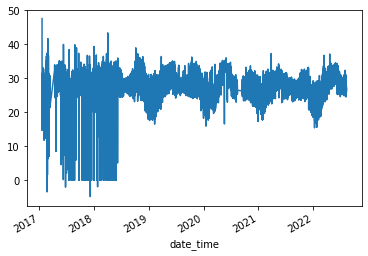

In [ ]:
df["TEMP(C)"].plot()

In [ ]:
df=df[df["TEMP(C)"]>10]

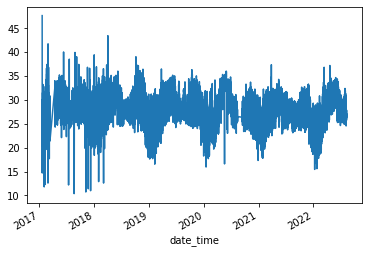

In [ ]:
df["TEMP(C)"].plot()

In [ ]:
df=df.resample("H").mean().interpolate(method="linear",limit_direction="forward")

In [ ]:
from datetime import datetime

In [ ]:
mnth=datetime.now().strftime("%B")

In [ ]:
data_temp=pd.DataFrame(df["TEMP(C)"].copy().values)

In [ ]:
data_rh=pd.DataFrame(df["RH(%)"].copy().values)

In [ ]:
data_rain=pd.DataFrame(df["RAIN_DAILY(mm)"].copy().values)

In [ ]:
data_dp=pd.DataFrame(df["DEW_POINT(C)"].copy().values)

In [ ]:
data_slp=pd.DataFrame(df["SLP(hPa)"].copy().values)

In [ ]:
data_mslp=pd.DataFrame(df["MSLP(hPa)"].copy().values)

#CREATION OF WINDOWS


In [ ]:
def create_windows(df, window_len, name):
  data_temp=pd.DataFrame(df.copy().values)
  dt=df.index.copy()
  windows=pd.DataFrame()

  windows.index=dt.copy()
  dic={}
  
  windows.index=windows.index.shift((window_len)-1)

  if name=="temp":
    for i in range(window_len-1,-1,-1):
      windows[f'{name}_{i}']=data_temp.shift(-i).values
    windows["Temp_Pred_True"]=windows.temp_335.shift(-120)
  if name=="dp":
    for i in range(window_len-1,-1,-1):
      windows[f'{name}_{i}']=data_dp.shift(-i).values
  if name=="rh":
    for i in range(window_len-1,-1,-1):
      windows[f'{name}_{i}']=data_rh.shift(-i).values
  if name=="rain":
    for i in range(window_len-1,-1,-1):
      windows[f'{name}_{i}']=data_rain.shift(-i).values
  if name=="slp":
    for i in range(window_len-1,-1,-1):
      windows[f'{name}_{i}']=data_slp.shift(-i).values
  if name=="mslp":
    for i in range(window_len-1,-1,-1):
      windows[f'{name}_{i}']=data_mslp.shift(-i).values
  windows.index=windows.index.shift(120)
  windows=windows.dropna()
  return windows


In [ ]:
temp_windows=create_windows(df["TEMP(C)"],336,"temp")

<ipython-input-41-59842043b996>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  windows[f'{name}_{i}']=data_temp.shift(-i).values
<ipython-input-41-59842043b996>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  windows["Temp_Pred_True"]=windows.temp_335.shift(-120)


In [ ]:
dp_windows=create_windows(df["DEW_POINT(C)"],336,"dp")

<ipython-input-41-59842043b996>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  windows[f'{name}_{i}']=data_dp.shift(-i).values


In [ ]:
rh_windows=create_windows(df["RH(%)"],336,"rh")

<ipython-input-41-59842043b996>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  windows[f'{name}_{i}']=data_rh.shift(-i).values


In [ ]:
slp_windows=create_windows(df["SLP(hPa)"],336,"slp")

<ipython-input-41-59842043b996>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  windows[f'{name}_{i}']=data_slp.shift(-i).values


In [ ]:
rain_windows=create_windows(df["RAIN_DAILY(mm)"],336,"rain")

<ipython-input-41-59842043b996>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  windows[f'{name}_{i}']=data_rain.shift(-i).values


In [ ]:
mslp_windows=create_windows(df["MSLP(hPa)"],336,"mslp")

<ipython-input-41-59842043b996>:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  windows[f'{name}_{i}']=data_mslp.shift(-i).values


**IMD k hisaab se**

Winter -> January - February

Pre-monsoon -> March - May

Monsoon -> June - September

Post-monsoon -> October - December



In [ ]:
df.loc["2021-01-01 00:00:00":"2021-02-28 23:00:00"]

,RAIN_DAILY(mm),TEMP(C),DEW_POINT(C),RH(%),SLP(hPa),MSLP(hPa)
date_time,,,,,,
2021-01-01 00:00:00,0.0,22.592857,21.414286,94.142857,1009.228571,1010.628571
2021-01-01 01:00:00,0.0,23.410714,21.353571,89.785714,1009.532143,1010.932143
2021-01-01 02:00:00,0.0,24.228571,21.292857,85.428571,1009.835714,1011.235714
2021-01-01 03:00:00,0.0,25.046429,21.232143,81.071429,1010.139286,1011.539286
2021-01-01 04:00:00,0.0,25.864286,21.171429,76.714286,1010.442857,1011.842857
...,...,...,...,...,...,...
2021-02-28 19:00:00,0.0,25.475000,19.400000,69.250000,1009.525000,1010.925000
2021-02-28 20:00:00,0.0,26.375000,18.150000,60.500000,1008.950000,1010.350000
2021-02-28 21:00:00,0.0,26.200000,18.200000,61.333333,1008.633333,1010.033333


In [ ]:
df.loc["2021-01-01 00:00:00":"2021-02-28 23:00:00"].corr()

,RAIN_DAILY(mm),TEMP(C),DEW_POINT(C),RH(%),SLP(hPa),MSLP(hPa)
RAIN_DAILY(mm),NaN,NaN,NaN,NaN,NaN,NaN
TEMP(C),NaN,1.000000,0.126339,-0.608316,-0.014659,-0.018191
DEW_POINT(C),NaN,0.126339,1.000000,0.692336,-0.457062,-0.455793
RH(%),NaN,-0.608316,0.692336,1.000000,-0.353984,-0.351047
SLP(hPa),NaN,-0.014659,-0.457062,-0.353984,1.000000,0.999966
MSLP(hPa),NaN,-0.018191,-0.455793,-0.351047,0.999966,1.000000


**MONSOON** => rain daily , dp , rh

In [ ]:
df.loc["2021-06-01 00:00:00":"2021-09-30 23:00:00"].corr()

,RAIN_DAILY(mm),TEMP(C),DEW_POINT(C),RH(%),SLP(hPa),MSLP(hPa)
RAIN_DAILY(mm),1.000000,-0.354310,-0.021446,0.374494,-0.253284,-0.249052
TEMP(C),-0.354310,1.000000,0.344590,-0.893464,0.114362,0.098990
DEW_POINT(C),-0.021446,0.344590,1.000000,0.110320,-0.262010,-0.267118
RH(%),0.374494,-0.893464,0.110320,1.000000,-0.246388,-0.232571
SLP(hPa),-0.253284,0.114362,-0.262010,-0.246388,1.000000,0.999812
MSLP(hPa),-0.249052,0.098990,-0.267118,-0.232571,0.999812,1.000000


**WINTER** => dp , rh , slp ,mslp

In [ ]:
df.loc["2019-10-01 00:00:00":"2020-01-30 23:00:00"].corr()

,RAIN_DAILY(mm),TEMP(C),DEW_POINT(C),RH(%),SLP(hPa),MSLP(hPa)
RAIN_DAILY(mm),1.000000,-0.090521,0.064299,0.201111,-0.181274,-0.179082
TEMP(C),-0.090521,1.000000,0.669758,-0.246742,-0.319031,-0.328621
DEW_POINT(C),0.064299,0.669758,1.000000,0.546840,-0.471382,-0.474118
RH(%),0.201111,-0.246742,0.546840,1.000000,-0.266823,-0.259528
SLP(hPa),-0.181274,-0.319031,-0.471382,-0.266823,1.000000,0.999881
MSLP(hPa),-0.179082,-0.328621,-0.474118,-0.259528,0.999881,1.000000


#CREATION OF SUMMMER DF



In [ ]:
summer_temp_windows=pd.concat([temp_windows.loc["2017-02-01 00:00:00":"2017-05-31 23:00:00"],temp_windows.loc["2018-02-01 00:00:00":"2018-05-31 23:00:00"],temp_windows.loc["2019-02-01 00:00:00":"2019-05-31 23:00:00"],temp_windows.loc["2020-02-01 00:00:00":"2020-05-31 23:00:00"],temp_windows.loc["2021-02-01 00:00:00":"2021-05-31 23:00:00"]],axis=0)

In [ ]:
summer_dp_windows=pd.concat([dp_windows.loc["2017-02-01 00:00:00":"2017-05-31 23:00:00"],dp_windows.loc["2018-02-01 00:00:00":"2018-05-31 23:00:00"],dp_windows.loc["2019-02-01 00:00:00":"2019-05-31 23:00:00"],dp_windows.loc["2020-02-01 00:00:00":"2020-05-31 23:00:00"],dp_windows.loc["2021-02-01 00:00:00":"2021-05-31 23:00:00"]],axis=0)

In [ ]:
summer_rh_windows=pd.concat([rh_windows.loc["2017-02-01 00:00:00":"2017-05-31 23:00:00"],rh_windows.loc["2018-02-01 00:00:00":"2018-05-31 23:00:00"],rh_windows.loc["2019-02-01 00:00:00":"2019-05-31 23:00:00"],rh_windows.loc["2020-02-01 00:00:00":"2020-05-31 23:00:00"],rh_windows.loc["2021-02-01 00:00:00":"2021-05-31 23:00:00"]],axis=0)

In [ ]:
summer_slp_windows=pd.concat([slp_windows.loc["2017-02-01 00:00:00":"2017-05-31 23:00:00"],slp_windows.loc["2018-02-01 00:00:00":"2018-05-31 23:00:00"],slp_windows.loc["2019-02-01 00:00:00":"2019-05-31 23:00:00"],slp_windows.loc["2020-02-01 00:00:00":"2020-05-31 23:00:00"],slp_windows.loc["2021-02-01 00:00:00":"2021-05-31 23:00:00"]],axis=0)

In [ ]:
summer_mslp_windows=pd.concat([mslp_windows.loc["2017-02-01 00:00:00":"2017-05-31 23:00:00"],mslp_windows.loc["2018-02-01 00:00:00":"2018-05-31 23:00:00"],mslp_windows.loc["2019-02-01 00:00:00":"2019-05-31 23:00:00"],mslp_windows.loc["2020-02-01 00:00:00":"2020-05-31 23:00:00"],mslp_windows.loc["2021-02-01 00:00:00":"2021-05-31 23:00:00"]],axis=0)

In [ ]:
summer_df=pd.concat([summer_dp_windows,summer_mslp_windows,summer_slp_windows,summer_rh_windows,summer_temp_windows],axis=1)

In [ ]:
summer_df

,dp_335,dp_334,dp_333,dp_332,dp_331,dp_330,dp_329,dp_328,dp_327,dp_326,...,temp_8,temp_7,temp_6,temp_5,temp_4,temp_3,temp_2,temp_1,temp_0,Temp_Pred_True
date_time,,,,,,,,,,,,,,,,,,,,,
2017-02-07 05:00:00,19.800,19.900,22.100,21.400,21.500,21.700,20.700,19.500,20.400,9.700,...,24.800,25.400,26.200,27.000,27.500,27.900,28.400,38.000,47.600,26.004000
2017-02-07 06:00:00,20.300,19.800,19.900,22.100,21.400,21.500,21.700,20.700,19.500,20.400,...,24.800,24.800,25.400,26.200,27.000,27.500,27.900,28.400,38.000,26.000000
2017-02-07 07:00:00,20.900,20.300,19.800,19.900,22.100,21.400,21.500,21.700,20.700,19.500,...,24.700,24.800,24.800,25.400,26.200,27.000,27.500,27.900,28.400,25.996000
2017-02-07 08:00:00,21.500,20.900,20.300,19.800,19.900,22.100,21.400,21.500,21.700,20.700,...,23.500,24.700,24.800,24.800,25.400,26.200,27.000,27.500,27.900,25.992000
2017-02-07 09:00:00,20.900,21.500,20.900,20.300,19.800,19.900,22.100,21.400,21.500,21.700,...,22.100,23.500,24.700,24.800,24.800,25.400,26.200,27.000,27.500,25.988000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31 19:00:00,23.825,24.025,23.700,23.875,23.700,23.775,23.600,23.675,23.875,24.275,...,30.300,29.950,29.125,27.325,27.025,27.275,26.975,26.825,27.075,28.175000
2021-05-31 20:00:00,24.100,23.825,24.025,23.700,23.875,23.700,23.775,23.600,23.675,23.875,...,31.450,30.300,29.950,29.125,27.325,27.025,27.275,26.975,26.825,28.233333
2021-05-31 21:00:00,23.850,24.100,23.825,24.025,23.700,23.875,23.700,23.775,23.600,23.675,...,32.275,31.450,30.300,29.950,29.125,27.325,27.025,27.275,26.975,28.150000


#CREATION OF MONSOON DF


In [ ]:
monsoon_temp_windows=pd.concat([temp_windows.loc["2017-06-01 00:00:00":"2017-09-30 23:00:00"],temp_windows.loc["2018-06-01 00:00:00":"2018-09-30 23:00:00"],temp_windows.loc["2019-06-01 00:00:00":"2019-09-30 23:00:00"],temp_windows.loc["2020-06-01 00:00:00":"2020-09-30 23:00:00"],temp_windows.loc["2021-06-01 00:00:00":"2021-09-30 23:00:00"]],axis=0)

In [ ]:
monsoon_dp_windows=pd.concat([dp_windows.loc["2017-06-01 00:00:00":"2017-09-30 23:00:00"],dp_windows.loc["2018-06-01 00:00:00":"2018-09-30 23:00:00"],dp_windows.loc["2019-06-01 00:00:00":"2019-09-30 23:00:00"],dp_windows.loc["2020-06-01 00:00:00":"2020-09-30 23:00:00"],dp_windows.loc["2021-06-01 00:00:00":"2021-09-30 23:00:00"]],axis=0)

In [ ]:
monsoon_rh_windows=pd.concat([rh_windows.loc["2017-06-01 00:00:00":"2017-09-30 23:00:00"],rh_windows.loc["2018-06-01 00:00:00":"2018-09-30 23:00:00"],rh_windows.loc["2019-06-01 00:00:00":"2019-09-30 23:00:00"],rh_windows.loc["2020-06-01 00:00:00":"2020-09-30 23:00:00"],rh_windows.loc["2021-06-01 00:00:00":"2021-09-30 23:00:00"]],axis=0)

In [ ]:
monsoon_rain_windows=pd.concat([rain_windows.loc["2017-06-01 00:00:00":"2017-09-30 23:00:00"],rain_windows.loc["2018-06-01 00:00:00":"2018-09-30 23:00:00"],rain_windows.loc["2019-06-01 00:00:00":"2019-09-30 23:00:00"],rain_windows.loc["2020-06-01 00:00:00":"2020-09-30 23:00:00"],rain_windows.loc["2021-06-01 00:00:00":"2021-09-30 23:00:00"]],axis=0)

In [ ]:
monsoon_df=pd.concat([monsoon_dp_windows,monsoon_rh_windows,monsoon_rain_windows,monsoon_temp_windows],axis=1)

In [ ]:
monsoon_df

,dp_335,dp_334,dp_333,dp_332,dp_331,dp_330,dp_329,dp_328,dp_327,dp_326,...,temp_8,temp_7,temp_6,temp_5,temp_4,temp_3,temp_2,temp_1,temp_0,Temp_Pred_True
date_time,,,,,,,,,,,,,,,,,,,,,
2017-06-01 00:00:00,26.900000,26.500000,26.650,26.800,26.300,26.200,26.700,27.000,27.100,27.300000,...,33.400000,33.900000,32.900000,32.200000,32.000000,31.900000,32.900000,29.900000,28.900000,29.000000
2017-06-01 01:00:00,26.800000,26.900000,26.500,26.650,26.800,26.300,26.200,26.700,27.000,27.100000,...,32.850000,33.400000,33.900000,32.900000,32.200000,32.000000,31.900000,32.900000,29.900000,29.000000
2017-06-01 02:00:00,27.200000,26.800000,26.900,26.500,26.650,26.800,26.300,26.200,26.700,27.000000,...,32.300000,32.850000,33.400000,33.900000,32.900000,32.200000,32.000000,31.900000,32.900000,29.600000
2017-06-01 03:00:00,27.600000,27.200000,26.800,26.900,26.500,26.650,26.800,26.300,26.200,26.700000,...,31.700000,32.300000,32.850000,33.400000,33.900000,32.900000,32.200000,32.000000,31.900000,32.100000
2017-06-01 04:00:00,28.100000,27.600000,27.200,26.800,26.900,26.500,26.650,26.800,26.300,26.200000,...,31.600000,31.700000,32.300000,32.850000,33.400000,33.900000,32.900000,32.200000,32.000000,32.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 19:00:00,24.275000,24.250000,24.225,24.225,24.175,24.300,24.350,24.225,24.625,24.766667,...,26.550000,26.833333,27.075000,26.450000,25.966667,25.525000,24.900000,24.800000,24.875000,25.725000
2021-09-30 20:00:00,24.350000,24.275000,24.250,24.225,24.225,24.175,24.300,24.350,24.225,24.625000,...,27.300000,26.550000,26.833333,27.075000,26.450000,25.966667,25.525000,24.900000,24.800000,25.566667
2021-09-30 21:00:00,24.175000,24.350000,24.275,24.250,24.225,24.225,24.175,24.300,24.350,24.225000,...,27.966667,27.300000,26.550000,26.833333,27.075000,26.450000,25.966667,25.525000,24.900000,25.475000


#CREATION OF WINTER DF



In [ ]:
winter_temp_windows=pd.concat([temp_windows.loc["2017-10-01 00:00:00":"2018-01-30 23:00:00"],temp_windows.loc["2018-10-01 00:00:00":"2019-01-30 23:00:00"],temp_windows.loc["2019-10-01 00:00:00":"2020-01-30 23:00:00"],temp_windows.loc["2020-10-01 00:00:00":"2021-01-30 23:00:00"],temp_windows.loc["2021-10-01 00:00:00":"2022-01-30 23:00:00"]],axis=0)

In [ ]:
winter_dp_windows=pd.concat([dp_windows.loc["2017-10-01 00:00:00":"2018-01-30 23:00:00"],dp_windows.loc["2018-10-01 00:00:00":"2019-01-30 23:00:00"],dp_windows.loc["2019-10-01 00:00:00":"2020-01-30 23:00:00"],dp_windows.loc["2020-10-01 00:00:00":"2021-01-30 23:00:00"],dp_windows.loc["2021-10-01 00:00:00":"2022-01-30 23:00:00"]],axis=0)

In [ ]:
winter_slp_windows=pd.concat([slp_windows.loc["2017-10-01 00:00:00":"2018-01-30 23:00:00"],slp_windows.loc["2018-10-01 00:00:00":"2019-01-30 23:00:00"],slp_windows.loc["2019-10-01 00:00:00":"2020-01-30 23:00:00"],slp_windows.loc["2020-10-01 00:00:00":"2021-01-30 23:00:00"],slp_windows.loc["2021-10-01 00:00:00":"2022-01-30 23:00:00"]],axis=0)

In [ ]:
winter_mslp_windows=pd.concat([mslp_windows.loc["2017-10-01 00:00:00":"2018-01-30 23:00:00"],mslp_windows.loc["2018-10-01 00:00:00":"2019-01-30 23:00:00"],mslp_windows.loc["2019-10-01 00:00:00":"2020-01-30 23:00:00"],mslp_windows.loc["2020-10-01 00:00:00":"2021-01-30 23:00:00"],mslp_windows.loc["2021-10-01 00:00:00":"2022-01-30 23:00:00"]],axis=0)

In [ ]:
winter_rh_windows=pd.concat([rh_windows.loc["2017-10-01 00:00:00":"2018-01-30 23:00:00"],rh_windows.loc["2018-10-01 00:00:00":"2019-01-30 23:00:00"],rh_windows.loc["2019-10-01 00:00:00":"2020-01-30 23:00:00"],rh_windows.loc["2020-10-01 00:00:00":"2021-01-30 23:00:00"],rh_windows.loc["2021-10-01 00:00:00":"2022-01-30 23:00:00"]],axis=0)

In [ ]:
winter_df=pd.concat([winter_slp_windows,winter_mslp_windows,winter_rh_windows,winter_dp_windows,winter_temp_windows],axis=1)

In [ ]:
winter_df

,slp_335,slp_334,slp_333,slp_332,slp_331,slp_330,slp_329,slp_328,slp_327,slp_326,...,temp_8,temp_7,temp_6,temp_5,temp_4,temp_3,temp_2,temp_1,temp_0,Temp_Pred_True
date_time,,,,,,,,,,,,,,,,,,,,,
2017-10-01 00:00:00,1006.800,1006.200,1006.500,1006.700,1007.000,1007.500,1008.100,1008.000,1007.900,1007.700,...,32.300,31.800,32.500,32.400,32.700,30.500,28.800,28.300,27.700,30.716327
2017-10-01 01:00:00,1007.200,1006.800,1006.200,1006.500,1006.700,1007.000,1007.500,1008.100,1008.000,1007.900,...,31.000,32.300,31.800,32.500,32.400,32.700,30.500,28.800,28.300,30.714286
2017-10-01 02:00:00,1007.800,1007.200,1006.800,1006.200,1006.500,1006.700,1007.000,1007.500,1008.100,1008.000,...,30.900,31.000,32.300,31.800,32.500,32.400,32.700,30.500,28.800,30.712245
2017-10-01 03:00:00,1008.600,1007.800,1007.200,1006.800,1006.200,1006.500,1006.700,1007.000,1007.500,1008.100,...,30.600,30.900,31.000,32.300,31.800,32.500,32.400,32.700,30.500,30.710204
2017-10-01 04:00:00,1008.900,1008.600,1007.800,1007.200,1006.800,1006.200,1006.500,1006.700,1007.000,1007.500,...,29.700,30.600,30.900,31.000,32.300,31.800,32.500,32.400,32.700,30.708163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-30 19:00:00,1010.575,1010.875,1011.150,1011.200,1010.975,1010.450,1009.775,1009.075,1008.375,1008.425,...,21.350,19.600,17.950,16.925,17.275,17.000,16.700,17.950,19.425,20.675000
2022-01-30 20:00:00,1010.100,1010.575,1010.875,1011.150,1011.200,1010.975,1010.450,1009.775,1009.075,1008.375,...,22.100,21.350,19.600,17.950,16.925,17.275,17.000,16.700,17.950,19.875000
2022-01-30 21:00:00,1009.750,1010.100,1010.575,1010.875,1011.150,1011.200,1010.975,1010.450,1009.775,1009.075,...,23.125,22.100,21.350,19.600,17.950,16.925,17.275,17.000,16.700,19.225000


In [ ]:
winter_df.loc["2021-01-30 23:00:00":]

,slp_335,slp_334,slp_333,slp_332,slp_331,slp_330,slp_329,slp_328,slp_327,slp_326,...,temp_8,temp_7,temp_6,temp_5,temp_4,temp_3,temp_2,temp_1,temp_0,Temp_Pred_True
date_time,,,,,,,,,,,,,,,,,,,,,
2021-01-30 23:00:00,1011.200000,1011.050000,1011.525,1011.825,1012.250,1012.600,1012.850,1012.700,1012.450,1011.775,...,29.050000,30.550000,30.350000,28.400000,27.525000,25.550000,24.000000,23.700000,23.625000,20.200000
2021-10-01 00:00:00,1004.150000,1004.000000,1004.200,1004.650,1005.475,1005.975,1006.650,1006.975,1006.900,1006.400,...,26.466667,26.125000,26.000000,27.966667,27.300000,26.550000,26.833333,27.075000,26.450000,25.150000
2021-10-01 01:00:00,1004.325000,1004.150000,1004.000,1004.200,1004.650,1005.475,1005.975,1006.650,1006.975,1006.900,...,26.250000,26.466667,26.125000,26.000000,27.966667,27.300000,26.550000,26.833333,27.075000,25.175000
2021-10-01 02:00:00,1004.933333,1004.325000,1004.150,1004.000,1004.200,1004.650,1005.475,1005.975,1006.650,1006.975,...,25.225000,26.250000,26.466667,26.125000,26.000000,27.966667,27.300000,26.550000,26.833333,26.225000
2021-10-01 03:00:00,1005.475000,1004.933333,1004.325,1004.150,1004.000,1004.200,1004.650,1005.475,1005.975,1006.650,...,25.025000,25.225000,26.250000,26.466667,26.125000,26.000000,27.966667,27.300000,26.550000,28.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-30 19:00:00,1010.575000,1010.875000,1011.150,1011.200,1010.975,1010.450,1009.775,1009.075,1008.375,1008.425,...,21.350000,19.600000,17.950000,16.925000,17.275000,17.000000,16.700000,17.950000,19.425000,20.675000
2022-01-30 20:00:00,1010.100000,1010.575000,1010.875,1011.150,1011.200,1010.975,1010.450,1009.775,1009.075,1008.375,...,22.100000,21.350000,19.600000,17.950000,16.925000,17.275000,17.000000,16.700000,17.950000,19.875000
2022-01-30 21:00:00,1009.750000,1010.100000,1010.575,1010.875,1011.150,1011.200,1010.975,1010.450,1009.775,1009.075,...,23.125000,22.100000,21.350000,19.600000,17.950000,16.925000,17.275000,17.000000,16.700000,19.225000


#SEPERATION INTO TRAINING AND TESTING SET


In [ ]:
summer_X_train=summer_df.loc[:"2020-05-31 23:00:00"].drop(["Temp_Pred_True"],axis=1)
summer_y_train=summer_df.loc[:"2020-05-31 23:00:00"]["Temp_Pred_True"].values
summer_X_test=summer_df.loc["2021-02-01 00:00:00":"2021-05-31 23:00:00"].drop(["Temp_Pred_True"],axis=1)
summer_y_test=summer_df.loc["2021-02-01 00:00:00":"2021-05-31 23:00:00"]["Temp_Pred_True"].values

In [ ]:
monsoon_X_train=monsoon_df.loc[:"2020-09-30 23:00:00"].drop(["Temp_Pred_True"],axis=1)
monsoon_y_train=monsoon_df.loc[:"2020-09-30 23:00:00"]["Temp_Pred_True"].values
monsoon_X_test=monsoon_df.loc["2021-06-01 00:00:00":"2021-09-30 23:00:00"].drop(["Temp_Pred_True"],axis=1)
monsoon_y_test=monsoon_df.loc["2021-06-01 00:00:00":"2021-09-30 23:00:00"]["Temp_Pred_True"].values

In [ ]:
winter_X_train=winter_df.loc[:"2021-01-30 23:00:00"].drop(["Temp_Pred_True"],axis=1)
winter_y_train=winter_df.loc[:"2021-01-30 23:00:00"]["Temp_Pred_True"].values
winter_X_test=winter_df.loc["2021-10-01 00:00:00":"2022-01-30 23:00:00"].drop(["Temp_Pred_True"],axis=1)
winter_y_test=winter_df.loc["2021-10-01 00:00:00":"2022-01-30 23:00:00"]["Temp_Pred_True"].values

#CATBOOST

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import catboost

In [ ]:
cat=catboost.CatBoostRegressor()

In [ ]:
summer_cat=cat.fit(summer_X_train,summer_y_train)

Learning rate set to 0.060137
0:	learn: 3.3806082	total: 1.68s	remaining: 27m 54s
1:	learn: 3.2465750	total: 2.65s	remaining: 22m 3s
2:	learn: 3.1172744	total: 3.39s	remaining: 18m 45s
3:	learn: 3.0019912	total: 4.25s	remaining: 17m 39s
4:	learn: 2.8944213	total: 4.82s	remaining: 15m 59s
5:	learn: 2.7954366	total: 5.32s	remaining: 14m 41s
6:	learn: 2.7015423	total: 5.85s	remaining: 13m 49s
7:	learn: 2.6124194	total: 6.34s	remaining: 13m 6s
8:	learn: 2.5275977	total: 6.83s	remaining: 12m 32s
9:	learn: 2.4542624	total: 7.36s	remaining: 12m 9s
10:	learn: 2.3825843	total: 7.84s	remaining: 11m 44s
11:	learn: 2.3168876	total: 8.35s	remaining: 11m 27s
12:	learn: 2.2531685	total: 8.85s	remaining: 11m 12s
13:	learn: 2.1950031	total: 9.35s	remaining: 10m 58s
14:	learn: 2.1424282	total: 9.88s	remaining: 10m 48s
15:	learn: 2.0931164	total: 10.4s	remaining: 10m 38s
16:	learn: 2.0481129	total: 10.9s	remaining: 10m 28s
17:	learn: 2.0065601	total: 11.4s	remaining: 10m 20s
18:	learn: 1.9668558	total: 1

In [ ]:
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.0 MB 1.9 MB/s 


In [ ]:
from sklearn.metrics import mean_squared_error
import math

In [ ]:
def rmse(y,preds):
  return math.sqrt(mean_squared_error(y,preds))

In [ ]:
preds_summer_cat=summer_cat.predict(summer_X_test)
print(rmse(summer_y_test,preds_summer_cat))

1.7129911225249268


In [ ]:
summer_y_test=pd.DataFrame(summer_y_test)
preds_summer_cat=pd.DataFrame(preds_summer_cat)

---------------------------------February 2021-----------------------------------


----------------------------------1st to 5th--------------------------




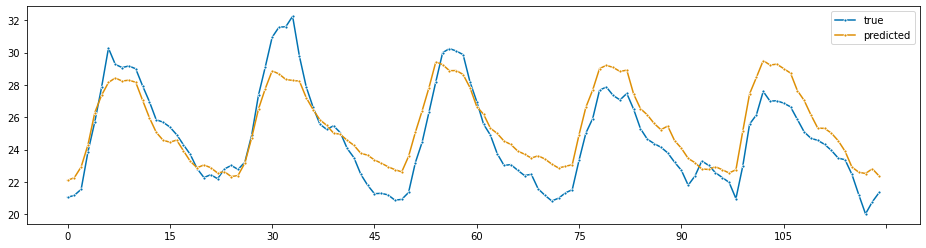

Correct : 0.39669421487603307
Accurate : 0.8512396694214877
Wrong : 0.1487603305785124


----------------------------------15th to 20th------------------------




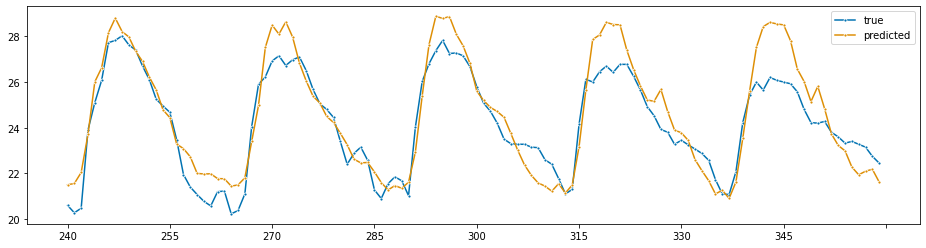

Correct : 0.7107438016528925
Accurate : 0.9586776859504132
Wrong : 0.04132231404958678


---------------------------------March 2021-----------------------------------


----------------------------------1st to 5th--------------------------




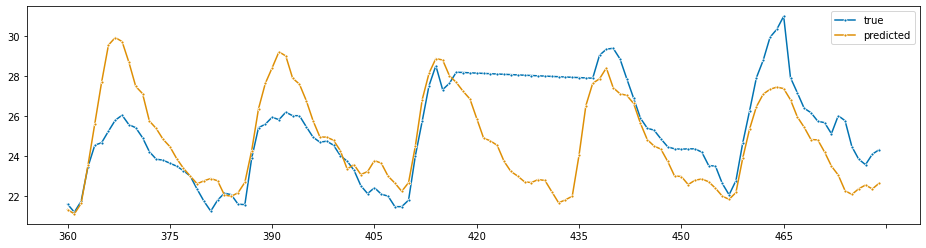

Correct : 0.4049586776859504
Accurate : 0.71900826446281
Wrong : 0.2809917355371901


----------------------------------15th to 20th------------------------




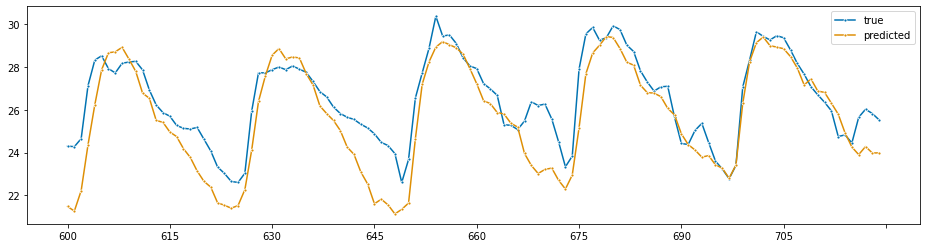

Correct : 0.628099173553719
Accurate : 0.8512396694214877
Wrong : 0.1487603305785124


---------------------------------April 2021-----------------------------------


----------------------------------1st to 5th--------------------------




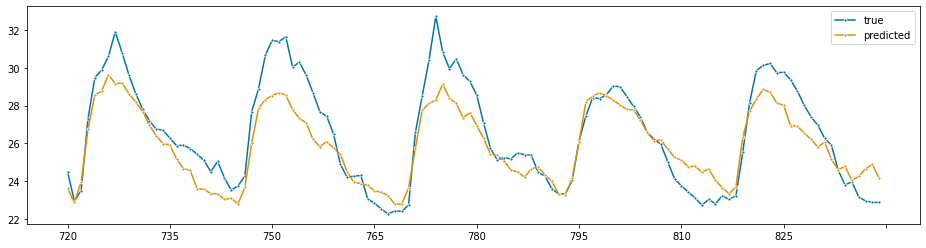

Correct : 0.5537190082644629
Accurate : 0.8760330578512396
Wrong : 0.12396694214876033


----------------------------------15th to 20th------------------------




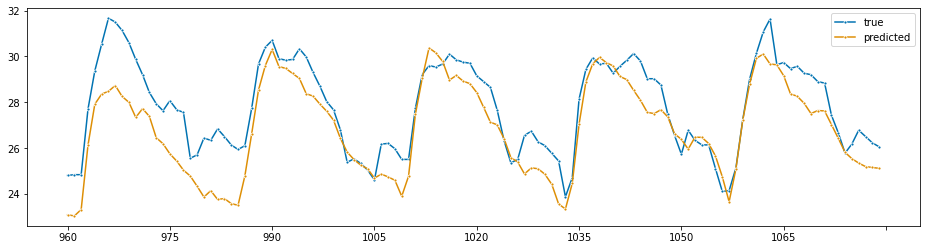

Correct : 0.49586776859504134
Accurate : 0.8760330578512396
Wrong : 0.12396694214876033


---------------------------------May 2021-----------------------------------


----------------------------------1st to 5th--------------------------




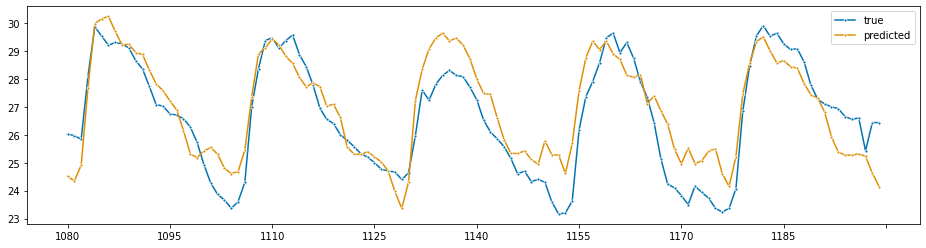

Correct : 0.6033057851239669
Accurate : 0.9504132231404959
Wrong : 0.049586776859504134


----------------------------------15th to 20th------------------------




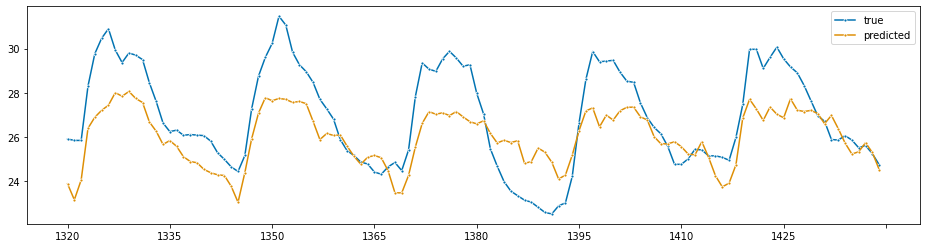

Correct : 0.35537190082644626
Accurate : 0.743801652892562
Wrong : 0.256198347107438




In [ ]:
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt

months=["February","March","April","May"]
dates=[1,15]
temp=0
a=[]
c=[]
w=[]
for i in range(len(months)):
  print(f'---------------------------------{months[i]} 2021-----------------------------------')
  print("\n")
  for j in dates:
    if j==1:
      print(f'----------------------------------1st to 5th--------------------------')
      print("\n")
      plot_series(
          summer_y_test[temp:temp+120],
          preds_summer_cat[temp:temp+120],
          markers=[".","."],
          labels=["true","predicted"]
      )
      plt.show()
      cr=0
      acc=0
      wr=0
      y1=summer_y_test.loc[temp:temp+120]
      y2=preds_summer_cat.loc[temp:temp+120]
      y1=y1.squeeze()
      y2=y2.squeeze()
      for k in range(temp,(temp+121)):
        diff=y1[k]-y2[k]
        if diff >=-2 and diff <=2:
          if diff>=-1 and diff<=1:
            cr+=1
          acc+=1
        else:
          wr+=1
      cr=cr/121
      acc=acc/121
      wr=wr/121
      # val="1-5 " + months[i]
      # h=len(acc_df)
      # acc_df.insert(0,val,cr,acc,wr)
      a.append(acc)
      c.append(cr)
      w.append(wr)
      print("Correct : " + str(cr))
      print("Accurate : " + str(acc))
      print("Wrong : " + str(wr))
      print("\n")
      temp+=120
    else:
      print(f'----------------------------------15th to 20th------------------------')
      print("\n")
      plot_series(
          summer_y_test[temp+120:temp+240],
          preds_summer_cat[temp+120:temp+240],
          markers=[".","."],
          labels=["true","predicted"]
      )
      plt.show()
      cr=0
      acc=0
      wr=0
      for k in range(temp+120,(temp+241)):
        y1=summer_y_test.loc[temp+120:temp+240]
        y2=preds_summer_cat.loc[temp+120:temp+240]
        y1=y1.squeeze()
        y2=y2.squeeze()
        diff=y1[k]-y2[k]
        if diff >=-2 and diff <=2:
          if diff>=-1 and diff<=1:
            cr+=1
          acc+=1
        else:
          wr+=1
      cr=cr/121
      acc=acc/121
      wr=wr/121
      val="15-20 " + months[i]
      a.append(acc)
      c.append(cr)
      w.append(wr)
      print("Correct : " + str(cr))
      print("Accurate : " + str(acc))
      print("Wrong : " + str(wr))
      print("\n")
  temp+=240

[0.8512396694214877, 0.9586776859504132, 0.71900826446281, 0.8512396694214877, 0.8760330578512396, 0.8760330578512396, 0.9504132231404959, 0.743801652892562] [0.39669421487603307, 0.7107438016528925, 0.4049586776859504, 0.628099173553719, 0.5537190082644629, 0.49586776859504134, 0.6033057851239669, 0.35537190082644626] [0.1487603305785124, 0.04132231404958678, 0.2809917355371901, 0.1487603305785124, 0.12396694214876033, 0.12396694214876033, 0.049586776859504134, 0.256198347107438]


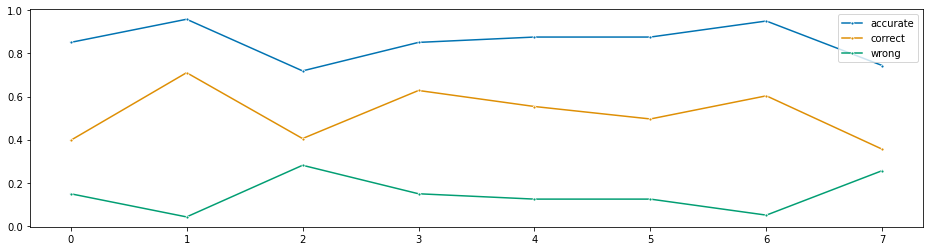

In [ ]:
plot_series(
    pd.DataFrame(a),
    pd.DataFrame(c),
    pd.DataFrame(w),
    markers=[".",".","."],
    labels=["accurate","correct","wrong"]
)

print(a,c,w)

In [ ]:
monsoon_cat=cat.fit(monsoon_X_train,monsoon_y_train)

Learning rate set to 0.060398
0:	learn: 2.1034067	total: 601ms	remaining: 10m
1:	learn: 2.0619356	total: 1.02s	remaining: 8m 30s
2:	learn: 2.0242830	total: 1.43s	remaining: 7m 56s
3:	learn: 1.9903098	total: 1.84s	remaining: 7m 39s
4:	learn: 1.9562821	total: 2.25s	remaining: 7m 28s
5:	learn: 1.9280148	total: 2.66s	remaining: 7m 21s
6:	learn: 1.9009146	total: 3.07s	remaining: 7m 15s
7:	learn: 1.8740348	total: 3.48s	remaining: 7m 11s
8:	learn: 1.8490861	total: 3.89s	remaining: 7m 8s
9:	learn: 1.8271799	total: 4.3s	remaining: 7m 5s
10:	learn: 1.8075237	total: 4.72s	remaining: 7m 4s
11:	learn: 1.7898317	total: 5.13s	remaining: 7m 2s
12:	learn: 1.7709061	total: 5.55s	remaining: 7m 1s
13:	learn: 1.7541020	total: 5.97s	remaining: 7m
14:	learn: 1.7393491	total: 6.37s	remaining: 6m 58s
15:	learn: 1.7244636	total: 6.77s	remaining: 6m 56s
16:	learn: 1.7110139	total: 7.19s	remaining: 6m 55s
17:	learn: 1.6985951	total: 7.59s	remaining: 6m 54s
18:	learn: 1.6866614	total: 8.23s	remaining: 7m 5s
19:	le

In [ ]:
preds_monsoon_cat=monsoon_cat.predict(monsoon_X_test)

In [ ]:
print(rmse(monsoon_y_test,preds_monsoon_cat))

1.7118155023691515


In [ ]:
monsoon_y_test=pd.DataFrame(monsoon_y_test)
preds_monsoon_cat=pd.DataFrame(preds_monsoon_cat)

---------------------------------June 2021-----------------------------------


----------------------------------1st to 5th--------------------------




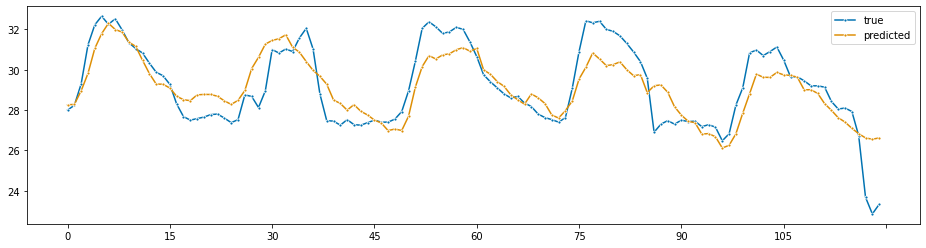

Correct : 0.6446280991735537
Accurate : 0.9256198347107438
Wrong : 0.0743801652892562


----------------------------------15th to 20th------------------------




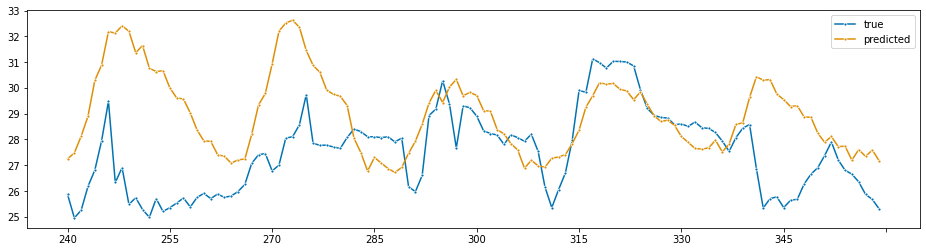

Correct : 0.38016528925619836
Accurate : 0.6528925619834711
Wrong : 0.34710743801652894


---------------------------------July 2021-----------------------------------


----------------------------------1st to 5th--------------------------




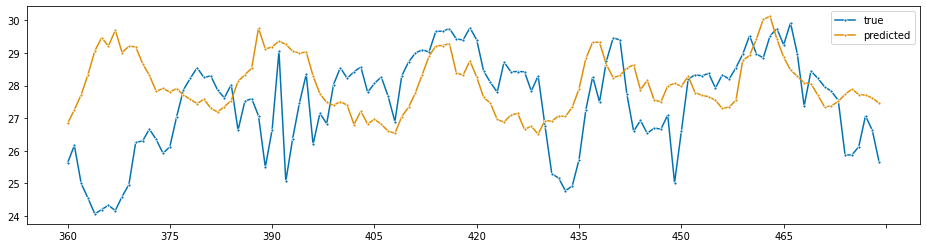

Correct : 0.45454545454545453
Accurate : 0.8099173553719008
Wrong : 0.19008264462809918


----------------------------------15th to 20th------------------------




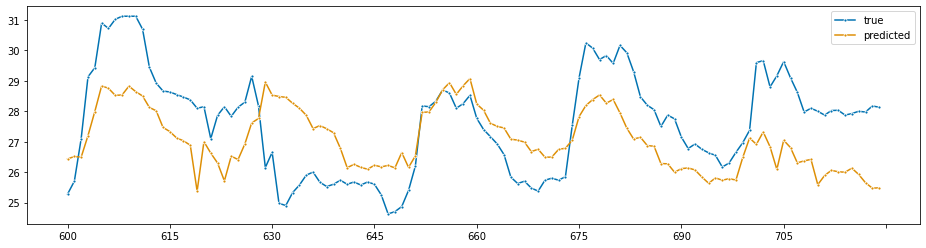

Correct : 0.32231404958677684
Accurate : 0.7520661157024794
Wrong : 0.24793388429752067


---------------------------------August 2021-----------------------------------


----------------------------------1st to 5th--------------------------




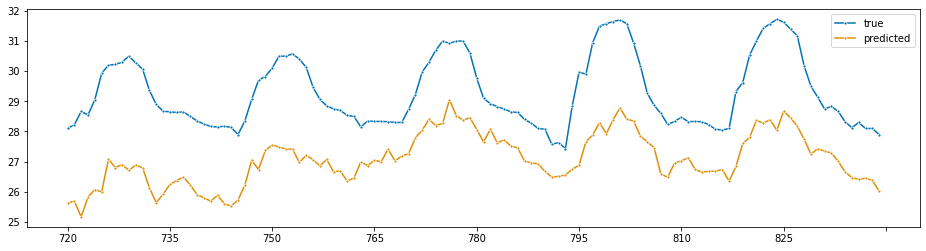

Correct : 0.024793388429752067
Accurate : 0.4132231404958678
Wrong : 0.5867768595041323


----------------------------------15th to 20th------------------------




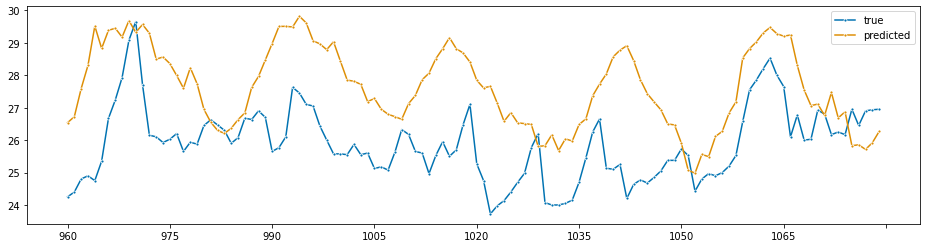

Correct : 0.2231404958677686
Accurate : 0.5950413223140496
Wrong : 0.4049586776859504


---------------------------------September 2021-----------------------------------


----------------------------------1st to 5th--------------------------




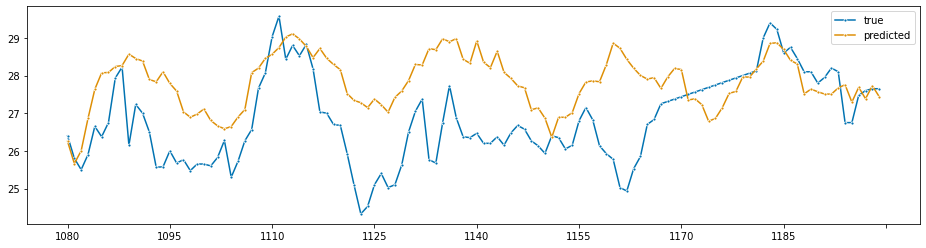

Correct : 0.5041322314049587
Accurate : 0.8016528925619835
Wrong : 0.19834710743801653


----------------------------------15th to 20th------------------------




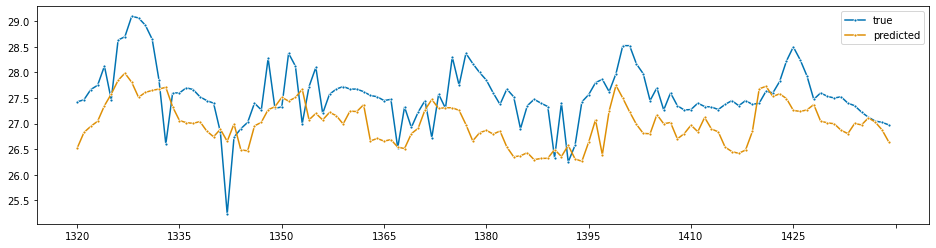

Correct : 0.7933884297520661
Accurate : 1.0
Wrong : 0.0




In [ ]:
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt

months=["June","July","August","September"]
dates=[1,15]
temp=0
a=[]
c=[]
w=[]
for i in range(len(months)):
  print(f'---------------------------------{months[i]} 2021-----------------------------------')
  print("\n")
  for j in dates:
    if j==1:
      print(f'----------------------------------1st to 5th--------------------------')
      print("\n")
      plot_series(
          monsoon_y_test[temp:temp+120],
          preds_monsoon_cat[temp:temp+120],
          markers=[".","."],
          labels=["true","predicted"]
      )
      plt.show()
      cr=0
      acc=0
      wr=0
      y1=monsoon_y_test.loc[temp:temp+120]
      y2=preds_monsoon_cat.loc[temp:temp+120]
      y1=y1.squeeze()
      y2=y2.squeeze()
      for k in range(temp,(temp+121)):
        diff=y1[k]-y2[k]
        if diff >=-2 and diff <=2:
          if diff>=-1 and diff<=1:
            cr+=1
          acc+=1
        else:
          wr+=1
      cr=cr/121
      acc=acc/121
      wr=wr/121
      # val="1-5 " + months[i]
      # h=len(acc_df)
      # acc_df.insert(0,val,cr,acc,wr)
      a.append(acc)
      c.append(cr)
      w.append(wr)
      print("Correct : " + str(cr))
      print("Accurate : " + str(acc))
      print("Wrong : " + str(wr))
      print("\n")
      temp+=120
    else:
      print(f'----------------------------------15th to 20th------------------------')
      print("\n")
      plot_series(
          monsoon_y_test[temp+120:temp+240],
          preds_monsoon_cat[temp+120:temp+240],
          markers=[".","."],
          labels=["true","predicted"]
      )
      plt.show()
      cr=0
      acc=0
      wr=0
      for k in range(temp+120,(temp+241)):
        y1=monsoon_y_test.loc[temp+120:temp+240]
        y2=preds_monsoon_cat.loc[temp+120:temp+240]
        y1=y1.squeeze()
        y2=y2.squeeze()
        diff=y1[k]-y2[k]
        if diff >=-2 and diff <=2:
          if diff>=-1 and diff<=1:
            cr+=1
          acc+=1
        else:
          wr+=1
      cr=cr/121
      acc=acc/121
      wr=wr/121
      val="15-20 " + months[i]
      a.append(acc)
      c.append(cr)
      w.append(wr)
      print("Correct : " + str(cr))
      print("Accurate : " + str(acc))
      print("Wrong : " + str(wr))
      print("\n")
  temp+=240

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7749f94310>)

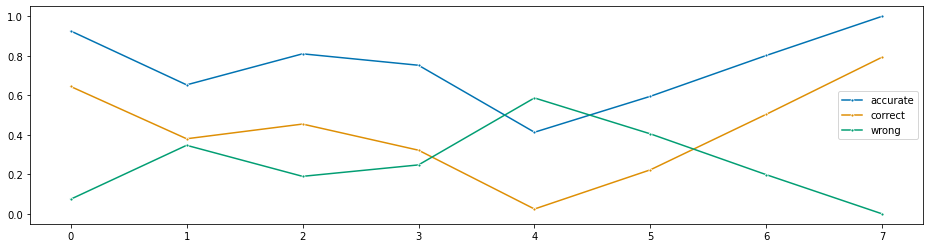

In [ ]:
plot_series(
    pd.DataFrame(a),
    pd.DataFrame(c),
    pd.DataFrame(w),
    markers=[".",".","."],
    labels=["accurate","correct","wrong"]
)

In [ ]:
winter_cat=cat.fit(winter_X_train,winter_y_train)
preds_winter_cat=winter_cat.predict(winter_X_test)

Learning rate set to 0.060398
0:	learn: 3.1362117	total: 678ms	remaining: 11m 17s
1:	learn: 3.0171997	total: 1.2s	remaining: 9m 58s
2:	learn: 2.9057141	total: 1.72s	remaining: 9m 30s
3:	learn: 2.8033913	total: 2.22s	remaining: 9m 13s
4:	learn: 2.7096660	total: 2.73s	remaining: 9m 3s
5:	learn: 2.6194924	total: 3.25s	remaining: 8m 58s
6:	learn: 2.5385161	total: 3.78s	remaining: 8m 55s
7:	learn: 2.4609617	total: 4.28s	remaining: 8m 50s
8:	learn: 2.3885879	total: 4.79s	remaining: 8m 47s
9:	learn: 2.3234492	total: 5.28s	remaining: 8m 42s
10:	learn: 2.2617755	total: 5.79s	remaining: 8m 40s
11:	learn: 2.2035374	total: 6.28s	remaining: 8m 37s
12:	learn: 2.1510791	total: 6.79s	remaining: 8m 35s
13:	learn: 2.1009951	total: 7.28s	remaining: 8m 32s
14:	learn: 2.0546291	total: 7.79s	remaining: 8m 31s
15:	learn: 2.0103258	total: 8.3s	remaining: 8m 30s
16:	learn: 1.9698628	total: 8.79s	remaining: 8m 28s
17:	learn: 1.9334263	total: 9.28s	remaining: 8m 26s
18:	learn: 1.9009396	total: 9.79s	remaining: 8

In [ ]:
print(rmse(winter_y_test,preds_winter_cat))

2.0899822392630902


In [ ]:
winter_y_test=pd.DataFrame(winter_y_test)
preds_winter_cat=pd.DataFrame(preds_winter_cat)

---------------------------------October 2021-----------------------------------


----------------------------------1st to 5th--------------------------




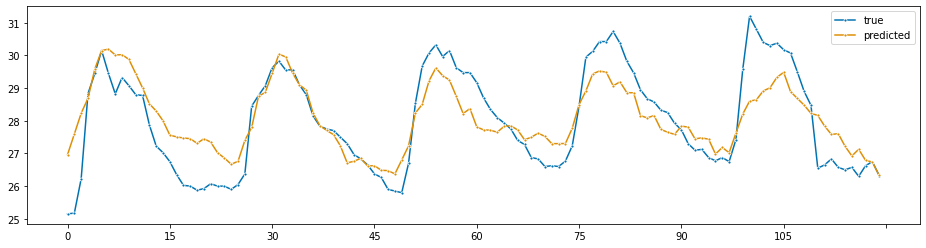

Correct : 0.743801652892562
Accurate : 0.9669421487603306
Wrong : 0.03305785123966942


----------------------------------15th to 20th------------------------




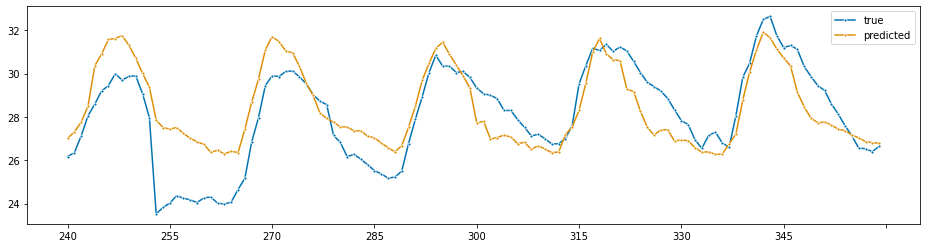

Correct : 0.512396694214876
Accurate : 0.8512396694214877
Wrong : 0.1487603305785124


---------------------------------November 2021-----------------------------------


----------------------------------1st to 5th--------------------------




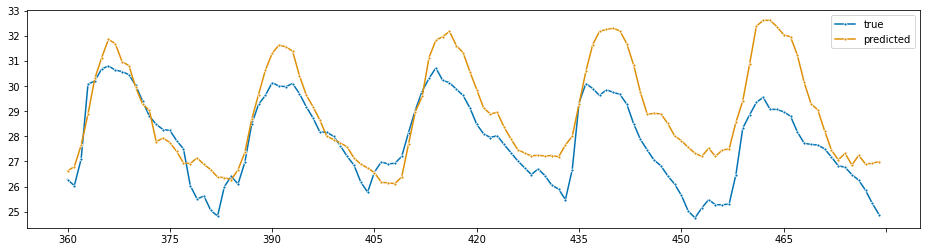

Correct : 0.49586776859504134
Accurate : 0.7603305785123967
Wrong : 0.2396694214876033


----------------------------------15th to 20th------------------------




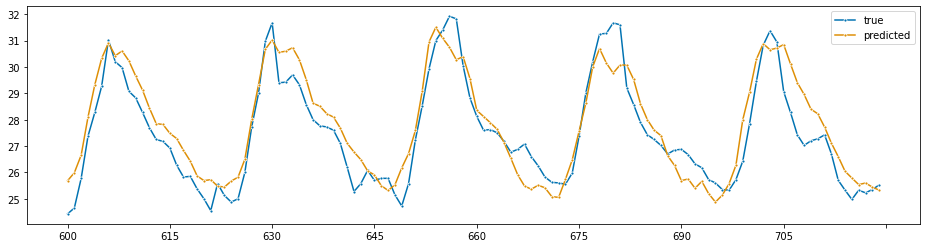

Correct : 0.7520661157024794
Accurate : 1.0
Wrong : 0.0


---------------------------------December 2021-----------------------------------


----------------------------------1st to 5th--------------------------




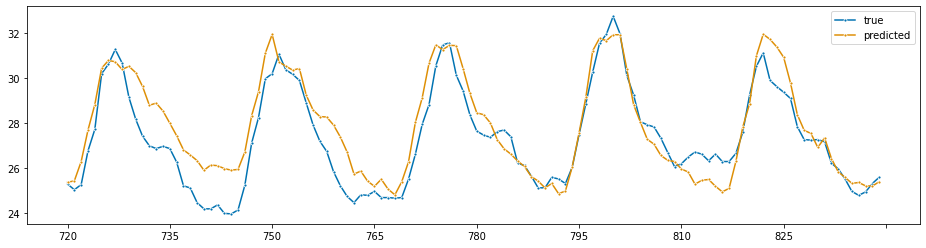

Correct : 0.6446280991735537
Accurate : 0.9586776859504132
Wrong : 0.04132231404958678


----------------------------------15th to 20th------------------------




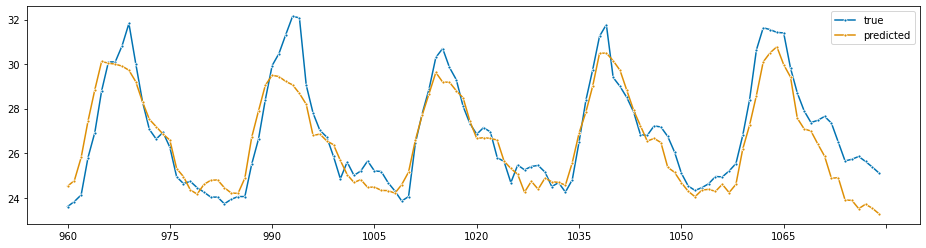

Correct : 0.7024793388429752
Accurate : 0.9338842975206612
Wrong : 0.06611570247933884


---------------------------------January 2022-----------------------------------


----------------------------------1st to 5th--------------------------




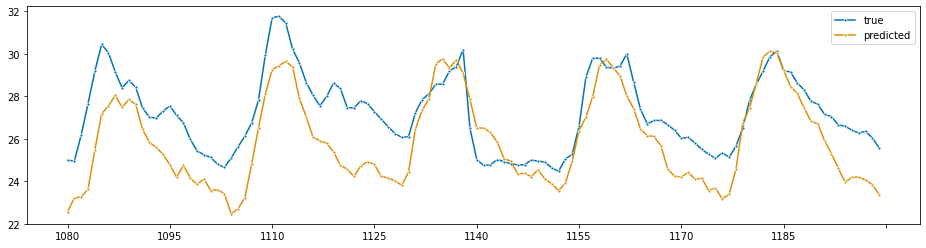

Correct : 0.33884297520661155
Accurate : 0.6942148760330579
Wrong : 0.30578512396694213


----------------------------------15th to 20th------------------------




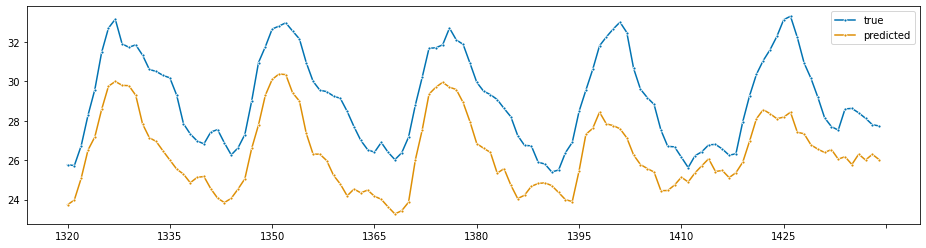

Correct : 0.05785123966942149
Accurate : 0.23140495867768596
Wrong : 0.768595041322314




In [ ]:
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt

months=["October","November","December","January"]
dates=[1,15]
temp=0
a=[]
c=[]
w=[]
for i in range(len(months)):
  if months[i]=="January":
    print(f'---------------------------------{months[i]} 2022-----------------------------------')
  else:
    print(f'---------------------------------{months[i]} 2021-----------------------------------')
  print("\n")
  for j in dates:
    if j==1:
      print(f'----------------------------------1st to 5th--------------------------')
      print("\n")
      plot_series(
          winter_y_test[temp:temp+120],
          preds_winter_cat[temp:temp+120],
          markers=[".","."],
          labels=["true","predicted"]
      )
      plt.show()
      cr=0
      acc=0
      wr=0
      y1=winter_y_test.loc[temp:temp+120]
      y2=preds_winter_cat.loc[temp:temp+120]
      y1=y1.squeeze()
      y2=y2.squeeze()
      for k in range(temp,(temp+121)):
        diff=y1[k]-y2[k]
        if diff >=-2 and diff <=2:
          if diff>=-1 and diff<=1:
            cr+=1
          acc+=1
        else:
          wr+=1
      cr=cr/121
      acc=acc/121
      wr=wr/121
      # val="1-5 " + months[i]
      # h=len(acc_df)
      # acc_df.insert(0,val,cr,acc,wr)
      a.append(acc)
      c.append(cr)
      w.append(wr)
      print("Correct : " + str(cr))
      print("Accurate : " + str(acc))
      print("Wrong : " + str(wr))
      print("\n")
      temp+=120
    else:
      print(f'----------------------------------15th to 20th------------------------')
      print("\n")
      plot_series(
          winter_y_test[temp+120:temp+240],
          preds_winter_cat[temp+120:temp+240],
          markers=[".","."],
          labels=["true","predicted"]
      )
      plt.show()
      cr=0
      acc=0
      wr=0
      for k in range(temp+120,(temp+241)):
        y1=winter_y_test.loc[temp+120:temp+240]
        y2=preds_winter_cat.loc[temp+120:temp+240]
        y1=y1.squeeze()
        y2=y2.squeeze()
        diff=y1[k]-y2[k]
        if diff >=-2 and diff <=2:
          if diff>=-1 and diff<=1:
            cr+=1
          acc+=1
        else:
          wr+=1
      cr=cr/121
      acc=acc/121
      wr=wr/121
      val="15-20 " + months[i]
      a.append(acc)
      c.append(cr)
      w.append(wr)
      print("Correct : " + str(cr))
      print("Accurate : " + str(acc))
      print("Wrong : " + str(wr))
      print("\n")
  temp+=240

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f77490a8950>)

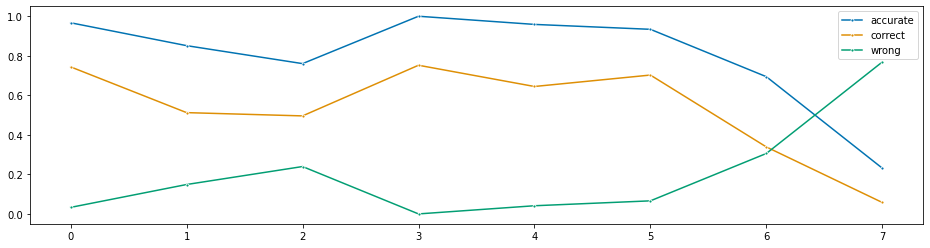

In [ ]:
plot_series(
    pd.DataFrame(a),
    pd.DataFrame(c),
    pd.DataFrame(w),
    markers=[".",".","."],
    labels=["accurate","correct","wrong"]
)

In [ ]:
import pickle
path="/content/drive/MyDrive/IMD/New Data Models"

pickle.dump(summer_cat,open(path+"/NewData_summer_catboost.pkl","wb"))
pickle.dump(monsoon_cat,open(path+"/NewData_monsoon_catboost.pkl","wb"))
pickle.dump(winter_cat,open(path+"/NewData_winter_catboost.pkl","wb"))

#LIGHTGBM

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm=LGBMRegressor()

In [ ]:
sumer_lgbm=lgbm.fit(summer_X_train,summer_y_train)

In [ ]:
summer_lgbm_preds=sumer_lgbm.predict(summer_X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import math

In [ ]:
def calc_rmse(act,preds):
  return math.sqrt(mean_squared_error(act,preds))

In [ ]:
calc_rmse(summer_lgbm_preds,summer_y_test)

1.6166951163428604

In [ ]:
summer_lgbm_preds=pd.DataFrame(summer_lgbm_preds)
summer_y_test=pd.DataFrame(summer_y_test)

In [ ]:
!pip install --quiet sktime

     |████████████████████████████████| 7.0 MB 4.7 MB/s 


---------------------------------Feb 2021-----------------------------------


----------------------------------1st to 5th--------------------------




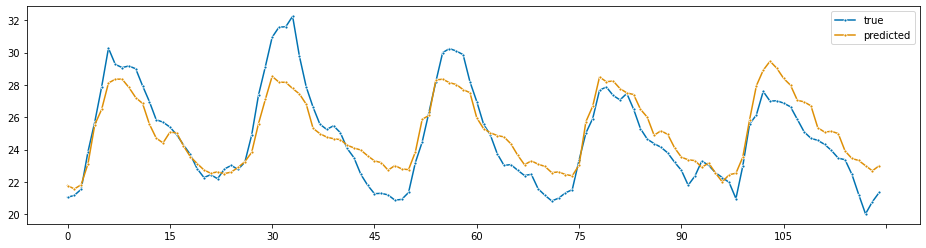

Correct : 0.48760330578512395
Accurate : 0.859504132231405
Wrong : 0.14049586776859505


----------------------------------15th to 20th------------------------




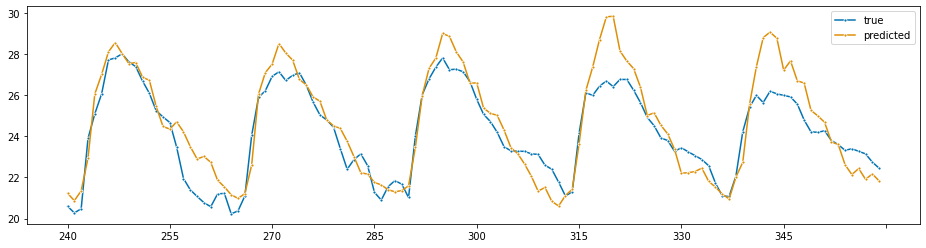

Correct : 0.6942148760330579
Accurate : 0.9173553719008265
Wrong : 0.08264462809917356


---------------------------------March 2021-----------------------------------


----------------------------------1st to 5th--------------------------




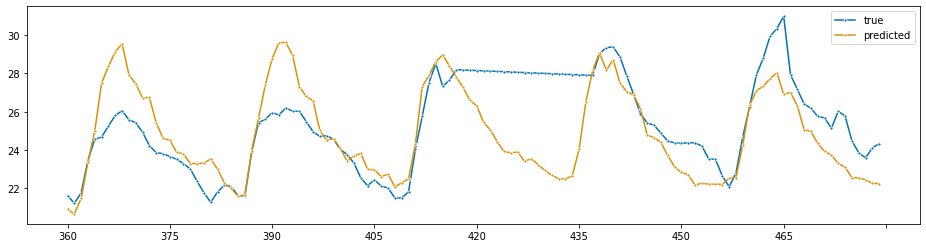

Correct : 0.4462809917355372
Accurate : 0.71900826446281
Wrong : 0.2809917355371901


----------------------------------15th to 20th------------------------




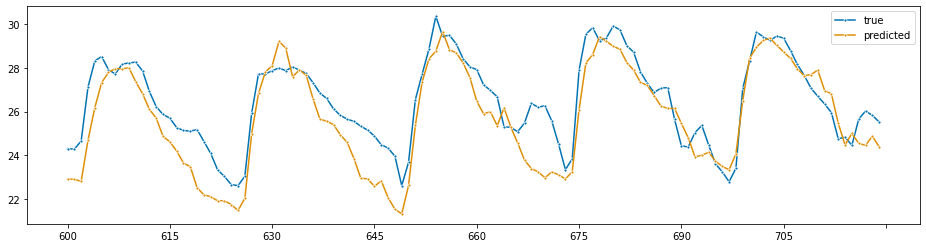

Correct : 0.5537190082644629
Accurate : 0.8925619834710744
Wrong : 0.10743801652892562


---------------------------------April 2021-----------------------------------


----------------------------------1st to 5th--------------------------




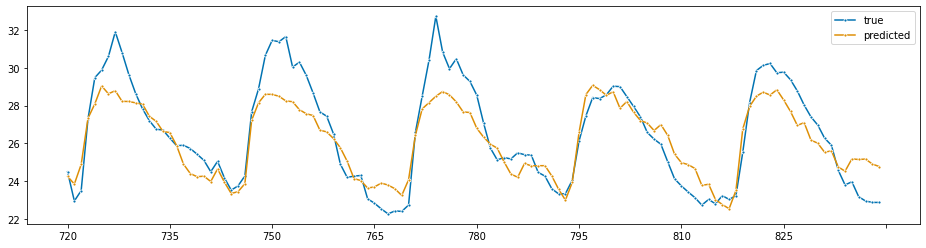

Correct : 0.5702479338842975
Accurate : 0.8842975206611571
Wrong : 0.11570247933884298


----------------------------------15th to 20th------------------------




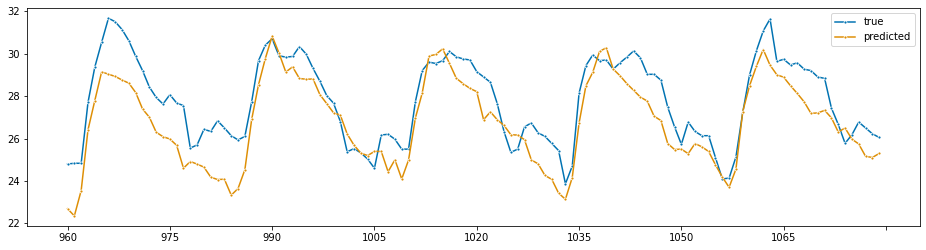

Correct : 0.5041322314049587
Accurate : 0.8677685950413223
Wrong : 0.1322314049586777


---------------------------------May 2021-----------------------------------


----------------------------------1st to 5th--------------------------




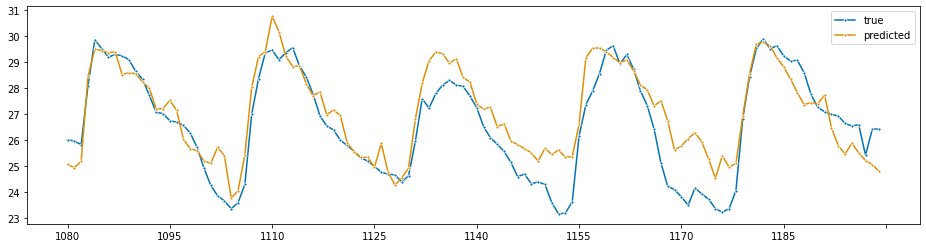

Correct : 0.6528925619834711
Accurate : 0.9338842975206612
Wrong : 0.06611570247933884


----------------------------------15th to 20th------------------------




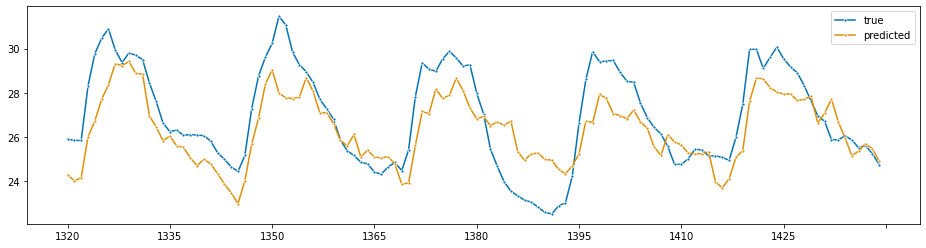

Correct : 0.4462809917355372
Accurate : 0.8099173553719008
Wrong : 0.19008264462809918




In [ ]:
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt

months=["Feb","March","April","May"]
dates=[1,15]
temp=0
a=[]
c=[]
w=[]
for i in range(len(months)):
  print(f'---------------------------------{months[i]} 2021-----------------------------------')
  print("\n")
  for j in dates:
    if j==1:
      print(f'----------------------------------1st to 5th--------------------------')
      print("\n")
      plot_series(
          summer_y_test[temp:temp+120],
          summer_lgbm_preds[temp:temp+120],
          markers=[".","."],
          labels=["true","predicted"]
      )
      plt.show()
      cr=0
      acc=0
      wr=0
      y1=summer_y_test.loc[temp:temp+120]
      y2=summer_lgbm_preds.loc[temp:temp+120]
      y1=y1.squeeze()
      y2=y2.squeeze()
      for k in range(temp,(temp+121)):
        diff=y1[k]-y2[k]
        if diff >=-2 and diff <=2:
          if diff>=-1 and diff<=1:
            cr+=1
          acc+=1
        else:
          wr+=1
      cr=cr/121
      acc=acc/121
      wr=wr/121
      # val="1-5 " + months[i]
      # h=len(acc_df)
      # acc_df.insert(0,val,cr,acc,wr)
      a.append(acc)
      c.append(cr)
      w.append(wr)
      print("Correct : " + str(cr))
      print("Accurate : " + str(acc))
      print("Wrong : " + str(wr))
      print("\n")
      temp+=120
    else:
      print(f'----------------------------------15th to 20th------------------------')
      print("\n")
      plot_series(
          summer_y_test[temp+120:temp+240],
          summer_lgbm_preds[temp+120:temp+240],
          markers=[".","."],
          labels=["true","predicted"]
      )
      plt.show()
      cr=0
      acc=0
      wr=0
      for k in range(temp+120,(temp+241)):
        y1=summer_y_test.loc[temp+120:temp+240]
        y2=summer_lgbm_preds.loc[temp+120:temp+240]
        y1=y1.squeeze()
        y2=y2.squeeze()
        diff=y1[k]-y2[k]
        if diff >=-2 and diff <=2:
          if diff>=-1 and diff<=1:
            cr+=1
          acc+=1
        else:
          wr+=1
      cr=cr/121
      acc=acc/121
      wr=wr/121
      val="15-20 " + months[i]
      a.append(acc)
      c.append(cr)
      w.append(wr)
      print("Correct : " + str(cr))
      print("Accurate : " + str(acc))
      print("Wrong : " + str(wr))
      print("\n")
  temp+=240

[0.859504132231405, 0.9173553719008265, 0.71900826446281, 0.8925619834710744, 0.8842975206611571, 0.8677685950413223, 0.9338842975206612, 0.8099173553719008] [0.48760330578512395, 0.6942148760330579, 0.4462809917355372, 0.5537190082644629, 0.5702479338842975, 0.5041322314049587, 0.6528925619834711, 0.4462809917355372] [0.14049586776859505, 0.08264462809917356, 0.2809917355371901, 0.10743801652892562, 0.11570247933884298, 0.1322314049586777, 0.06611570247933884, 0.19008264462809918]


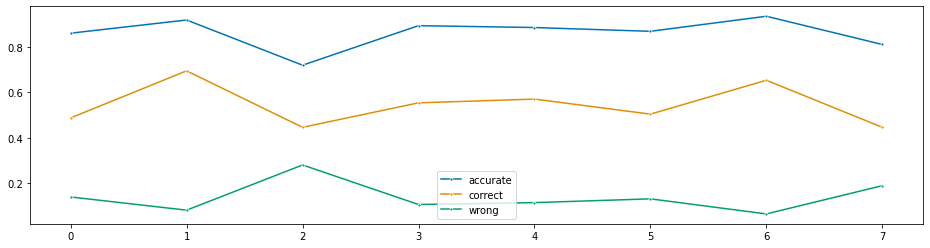

In [ ]:
plot_series(
    pd.DataFrame(a),
    pd.DataFrame(c),
    pd.DataFrame(w),
    markers=[".",".","."],
    labels=["accurate","correct","wrong"]
)

print(a,c,w)

In [ ]:
monsoon_lgbm=lgbm.fit(monsoon_X_train,monsoon_y_train)

In [ ]:
monsoon_lgbm_preds=monsoon_lgbm.predict(monsoon_X_test)

In [ ]:
calc_rmse(monsoon_y_test,monsoon_lgbm_preds)

1.7272024264829295

In [ ]:
monsoon_lgbm_preds=pd.DataFrame(monsoon_lgbm_preds)
monsoon_y_test=pd.DataFrame(monsoon_y_test)

---------------------------------June 2021-----------------------------------


----------------------------------1st to 5th--------------------------




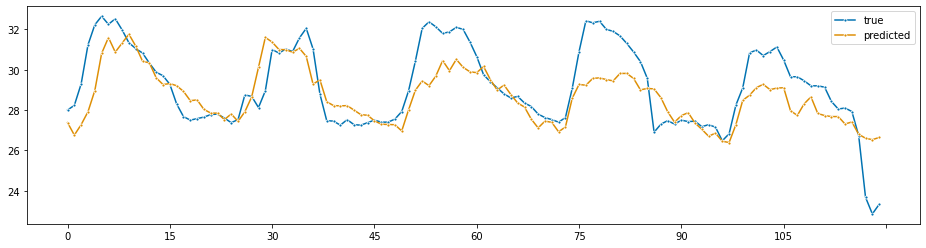

Correct : 0.6115702479338843
Accurate : 0.8429752066115702
Wrong : 0.15702479338842976


----------------------------------15th to 20th------------------------




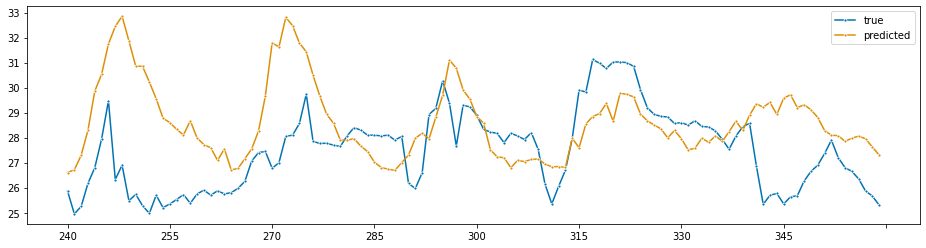

Correct : 0.39669421487603307
Accurate : 0.6528925619834711
Wrong : 0.34710743801652894


---------------------------------July 2021-----------------------------------


----------------------------------1st to 5th--------------------------




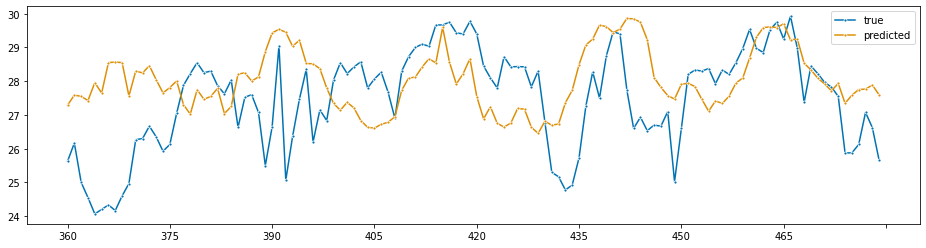

Correct : 0.4297520661157025
Accurate : 0.8016528925619835
Wrong : 0.19834710743801653


----------------------------------15th to 20th------------------------




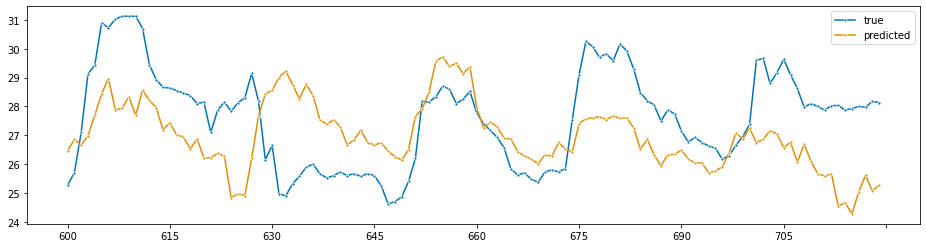

Correct : 0.2644628099173554
Accurate : 0.6446280991735537
Wrong : 0.35537190082644626


---------------------------------Aug 2021-----------------------------------


----------------------------------1st to 5th--------------------------




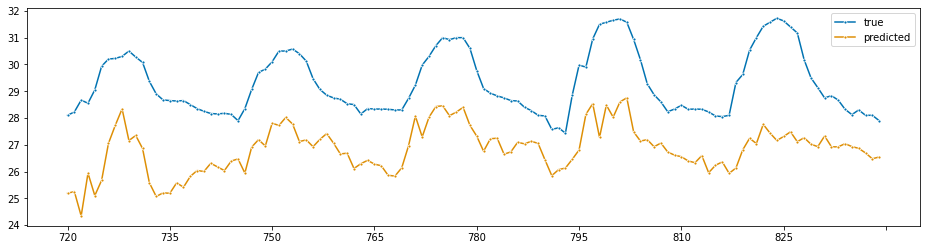

Correct : 0.0
Accurate : 0.36363636363636365
Wrong : 0.6363636363636364


----------------------------------15th to 20th------------------------




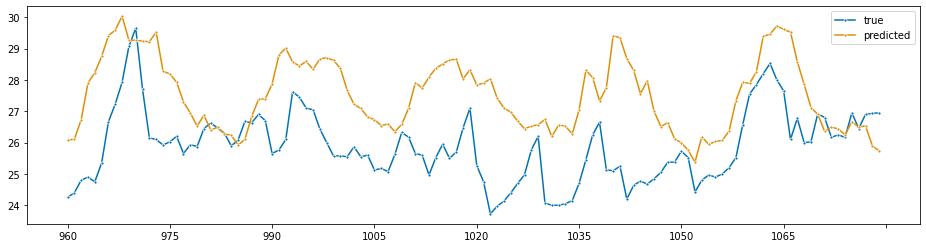

Correct : 0.3140495867768595
Accurate : 0.6115702479338843
Wrong : 0.3884297520661157


---------------------------------Sept 2021-----------------------------------


----------------------------------1st to 5th--------------------------




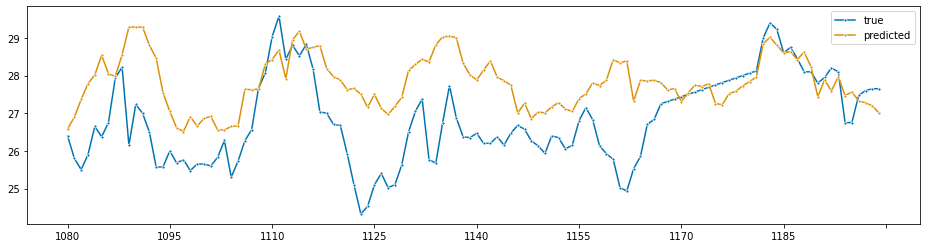

Correct : 0.5041322314049587
Accurate : 0.8347107438016529
Wrong : 0.1652892561983471


----------------------------------15th to 20th------------------------




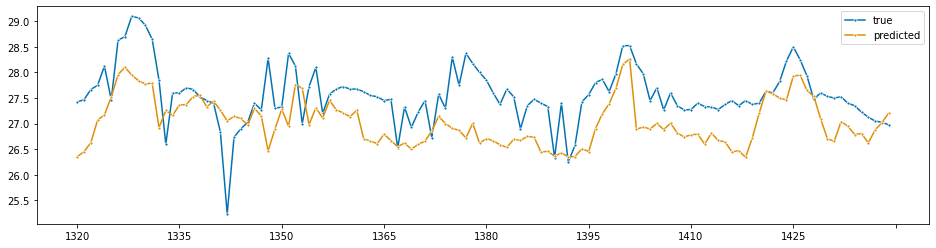

Correct : 0.8264462809917356
Accurate : 1.0
Wrong : 0.0




In [ ]:
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt

months=["June","July","Aug","Sept"]
dates=[1,15]
temp=0
a=[]
c=[]
w=[]
for i in range(len(months)):
  print(f'---------------------------------{months[i]} 2021-----------------------------------')
  print("\n")
  for j in dates:
    if j==1:
      print(f'----------------------------------1st to 5th--------------------------')
      print("\n")
      plot_series(
          monsoon_y_test[temp:temp+120],
          monsoon_lgbm_preds[temp:temp+120],
          markers=[".","."],
          labels=["true","predicted"]
      )
      plt.show()
      cr=0
      acc=0
      wr=0
      y1=monsoon_y_test.loc[temp:temp+120]
      y2=monsoon_lgbm_preds.loc[temp:temp+120]
      y1=y1.squeeze()
      y2=y2.squeeze()
      for k in range(temp,(temp+121)):
        diff=y1[k]-y2[k]
        if diff >=-2 and diff <=2:
          if diff>=-1 and diff<=1:
            cr+=1
          acc+=1
        else:
          wr+=1
      cr=cr/121
      acc=acc/121
      wr=wr/121
      # val="1-5 " + months[i]
      # h=len(acc_df)
      # acc_df.insert(0,val,cr,acc,wr)
      a.append(acc)
      c.append(cr)
      w.append(wr)
      print("Correct : " + str(cr))
      print("Accurate : " + str(acc))
      print("Wrong : " + str(wr))
      print("\n")
      temp+=120
    else:
      print(f'----------------------------------15th to 20th------------------------')
      print("\n")
      plot_series(
          monsoon_y_test[temp+120:temp+240],
          monsoon_lgbm_preds[temp+120:temp+240],
          markers=[".","."],
          labels=["true","predicted"]
      )
      plt.show()
      cr=0
      acc=0
      wr=0
      for k in range(temp+120,(temp+241)):
        y1=monsoon_y_test.loc[temp+120:temp+240]
        y2=monsoon_lgbm_preds.loc[temp+120:temp+240]
        y1=y1.squeeze()
        y2=y2.squeeze()
        diff=y1[k]-y2[k]
        if diff >=-2 and diff <=2:
          if diff>=-1 and diff<=1:
            cr+=1
          acc+=1
        else:
          wr+=1
      cr=cr/121
      acc=acc/121
      wr=wr/121
      val="15-20 " + months[i]
      a.append(acc)
      c.append(cr)
      w.append(wr)
      print("Correct : " + str(cr))
      print("Accurate : " + str(acc))
      print("Wrong : " + str(wr))
      print("\n")
  temp+=240

[0.8429752066115702, 0.6528925619834711, 0.8016528925619835, 0.6446280991735537, 0.36363636363636365, 0.6115702479338843, 0.8347107438016529, 1.0] [0.6115702479338843, 0.39669421487603307, 0.4297520661157025, 0.2644628099173554, 0.0, 0.3140495867768595, 0.5041322314049587, 0.8264462809917356] [0.15702479338842976, 0.34710743801652894, 0.19834710743801653, 0.35537190082644626, 0.6363636363636364, 0.3884297520661157, 0.1652892561983471, 0.0]


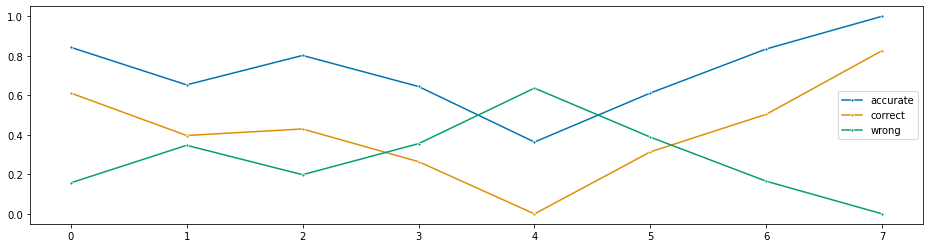

In [ ]:
plot_series(
    pd.DataFrame(a),
    pd.DataFrame(c),
    pd.DataFrame(w),
    markers=[".",".","."],
    labels=["accurate","correct","wrong"]
)

print(a,c,w)

In [ ]:
winter_lgbm=lgbm.fit(winter_X_train,winter_y_train)

In [ ]:
winter_lgbm_preds=winter_lgbm.predict(winter_X_test)

In [ ]:
calc_rmse(winter_lgbm_preds,winter_y_test)

2.032635910865438

In [ ]:
winter_lgbm_preds=pd.DataFrame(winter_lgbm_preds)
winter_y_test=pd.DataFrame(winter_y_test)

---------------------------------OCt 2021-----------------------------------


----------------------------------1st to 5th--------------------------




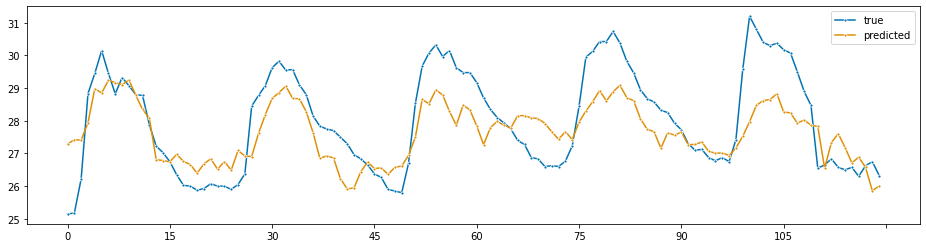

Correct : 0.6446280991735537
Accurate : 0.9586776859504132
Wrong : 0.04132231404958678


----------------------------------15th to 20th------------------------




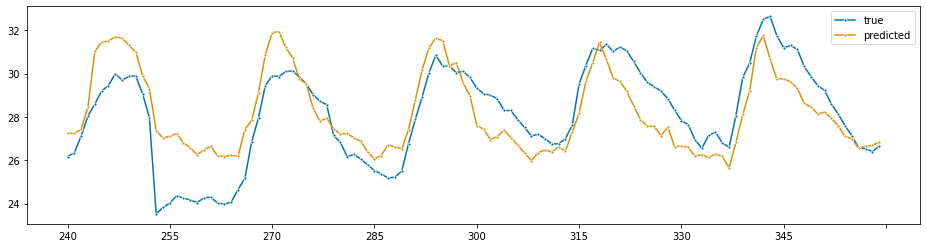

Correct : 0.4132231404958678
Accurate : 0.8099173553719008
Wrong : 0.19008264462809918


---------------------------------Nov 2021-----------------------------------


----------------------------------1st to 5th--------------------------




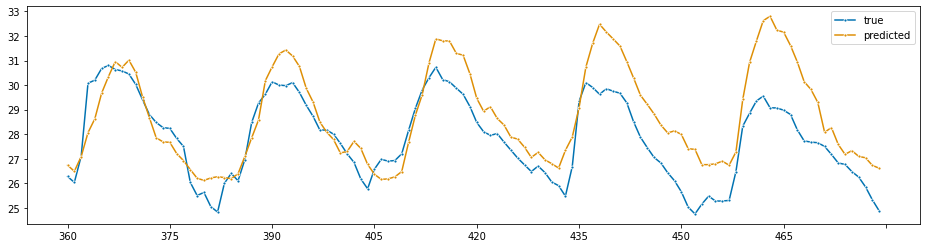

Correct : 0.5289256198347108
Accurate : 0.8512396694214877
Wrong : 0.1487603305785124


----------------------------------15th to 20th------------------------




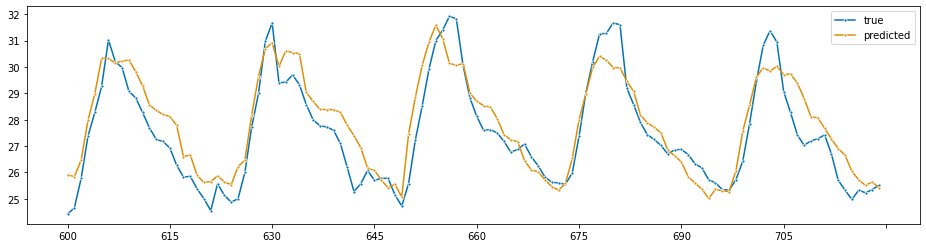

Correct : 0.71900826446281
Accurate : 0.9917355371900827
Wrong : 0.008264462809917356


---------------------------------Dec 2021-----------------------------------


----------------------------------1st to 5th--------------------------




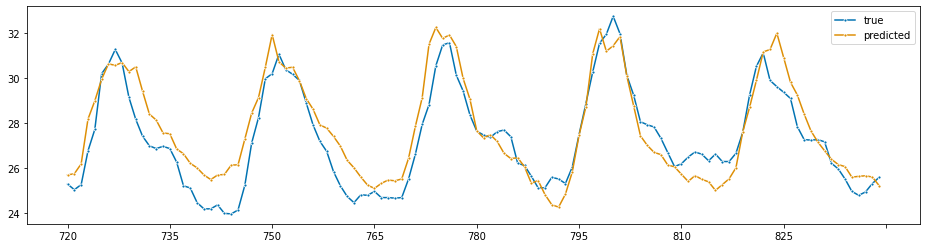

Correct : 0.6363636363636364
Accurate : 0.9504132231404959
Wrong : 0.049586776859504134


----------------------------------15th to 20th------------------------




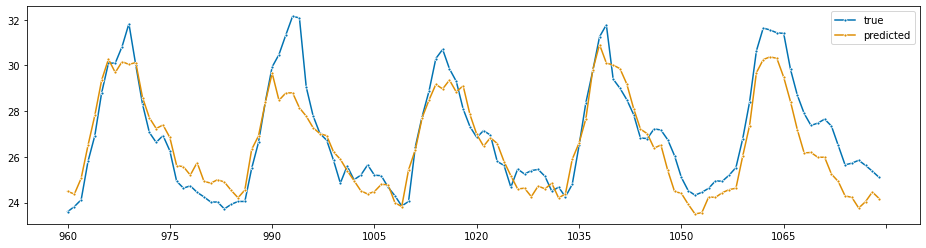

Correct : 0.7024793388429752
Accurate : 0.9504132231404959
Wrong : 0.049586776859504134


---------------------------------Jan 2021-----------------------------------


----------------------------------1st to 5th--------------------------




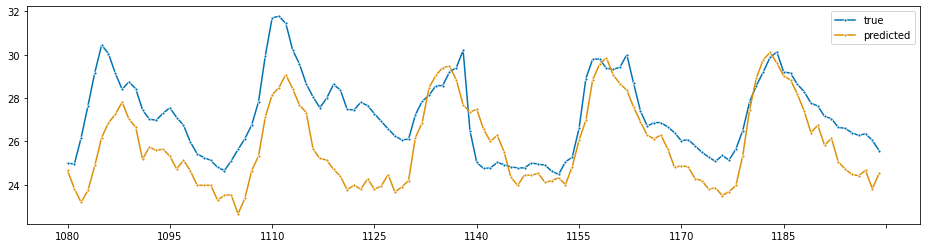

Correct : 0.3305785123966942
Accurate : 0.7272727272727273
Wrong : 0.2727272727272727


----------------------------------15th to 20th------------------------




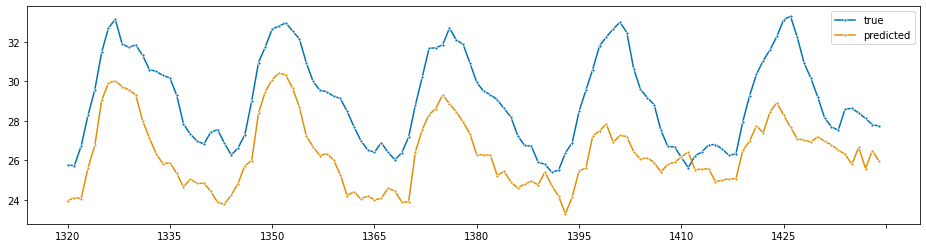

Correct : 0.0743801652892562
Accurate : 0.256198347107438
Wrong : 0.743801652892562




In [ ]:
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt

months=["OCt","Nov","Dec","Jan"]
dates=[1,15]
temp=0
a=[]
c=[]
w=[]
for i in range(len(months)):
  print(f'---------------------------------{months[i]} 2021-----------------------------------')
  print("\n")
  for j in dates:
    if j==1:
      print(f'----------------------------------1st to 5th--------------------------')
      print("\n")
      plot_series(
          winter_y_test[temp:temp+120],
          winter_lgbm_preds[temp:temp+120],
          markers=[".","."],
          labels=["true","predicted"]
      )
      plt.show()
      cr=0
      acc=0
      wr=0
      y1=winter_y_test.loc[temp:temp+120]
      y2=winter_lgbm_preds.loc[temp:temp+120]
      y1=y1.squeeze()
      y2=y2.squeeze()
      for k in range(temp,(temp+121)):
        diff=y1[k]-y2[k]
        if diff >=-2 and diff <=2:
          if diff>=-1 and diff<=1:
            cr+=1
          acc+=1
        else:
          wr+=1
      cr=cr/121
      acc=acc/121
      wr=wr/121
      # val="1-5 " + months[i]
      # h=len(acc_df)
      # acc_df.insert(0,val,cr,acc,wr)
      a.append(acc)
      c.append(cr)
      w.append(wr)
      print("Correct : " + str(cr))
      print("Accurate : " + str(acc))
      print("Wrong : " + str(wr))
      print("\n")
      temp+=120
    else:
      print(f'----------------------------------15th to 20th------------------------')
      print("\n")
      plot_series(
          winter_y_test[temp+120:temp+240],
          winter_lgbm_preds[temp+120:temp+240],
          markers=[".","."],
          labels=["true","predicted"]
      )
      plt.show()
      cr=0
      acc=0
      wr=0
      for k in range(temp+120,(temp+241)):
        y1=winter_y_test.loc[temp+120:temp+240]
        y2=winter_lgbm_preds.loc[temp+120:temp+240]
        y1=y1.squeeze()
        y2=y2.squeeze()
        diff=y1[k]-y2[k]
        if diff >=-2 and diff <=2:
          if diff>=-1 and diff<=1:
            cr+=1
          acc+=1
        else:
          wr+=1
      cr=cr/121
      acc=acc/121
      wr=wr/121
      val="15-20 " + months[i]
      a.append(acc)
      c.append(cr)
      w.append(wr)
      print("Correct : " + str(cr))
      print("Accurate : " + str(acc))
      print("Wrong : " + str(wr))
      print("\n")
  temp+=240

[0.9586776859504132, 0.8099173553719008, 0.8512396694214877, 0.9917355371900827, 0.9504132231404959, 0.9504132231404959, 0.7272727272727273, 0.256198347107438] [0.6446280991735537, 0.4132231404958678, 0.5289256198347108, 0.71900826446281, 0.6363636363636364, 0.7024793388429752, 0.3305785123966942, 0.0743801652892562] [0.04132231404958678, 0.19008264462809918, 0.1487603305785124, 0.008264462809917356, 0.049586776859504134, 0.049586776859504134, 0.2727272727272727, 0.743801652892562]


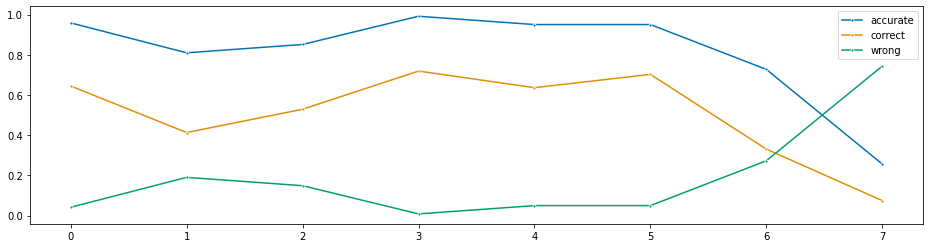

In [ ]:
plot_series(
    pd.DataFrame(a),
    pd.DataFrame(c),
    pd.DataFrame(w),
    markers=[".",".","."],
    labels=["accurate","correct","wrong"]
)

print(a,c,w)